### **Predição de Evasão Escolar: Avaliação de Técnicas de Balanceamento Supervisionadas com Interpretação Local via LIME**

In [1]:
# =====  INSTALAÇÃO DE BIBLIOTECAS =====
!pip install numpy==1.24.4
!pip install scikit-learn==1.4.2
!pip install imbalanced-learn==0.11.0 lime==0.2.0.1 xgboost==1.7.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 78.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pywavelets 1.9.0 requires numpy<3,>=1.25, but you have numpy 1.24.4 which is incompatible.
xarray 2025.7.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
jax 0.5.3 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.3 requires nu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 97.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.2 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 6.3 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=afaf1ec75a64238782fea2f9e01b50ddd845a9c2f745baa8df479bba89020ee7
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.0.3
    Uninstalling xgboost-3.0.3:
      Successfully uninstalled xgboost-3.0.3
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [1]:
# =====  IMPORTAÇÃO DE BIBLIOTECAS =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           precision_score, recall_score, f1_score, roc_auc_score,
                           average_precision_score, roc_curve, precision_recall_curve,
                           ConfusionMatrixDisplay)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
import xgboost as xgb
import lime
import lime.lime_tabular
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Conectar ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# =====  CARREGAMENTO E EXPLORAÇÃO DOS DADOS =====
print("="*70)
print(" PREDIÇÃO DE EVASÃO ESCOLAR - TÉCNICAS DE BALANCEAMENTO EXPANDIDAS")
print("="*70)

dataset_path = '/content/drive/MyDrive/Mestrado IFES/Artigo_Publicação/dataset.csv'
df = pd.read_csv(dataset_path)

print("\n=== INFORMAÇÕES BÁSICAS DO DATASET ===")
print(f"Formato do dataset: {df.shape}")
print(f"Total de colunas: {len(df.columns)}")
print(f"Primeiras colunas: {list(df.columns[:10])}")
if len(df.columns) > 10:
    print(f"... e mais {len(df.columns)-10} colunas")

print("\n=== AMOSTRA DOS DADOS ===")
print(df.head())

print("\n=== INFORMAÇÕES SOBRE QUALIDADE DOS DADOS ===")
missing_data = df.isnull().sum().sum()
print(f"Total de valores faltantes: {missing_data}")
print(f"Percentual de completude: {((df.size - missing_data) / df.size * 100):.1f}%")

# Indicação da coluna Target
print("\n=== IDENTIFICAÇÃO DA VARIÁVEL TARGET ===")
possible_targets = ['Target', 'target', 'dropout', 'Dropout', 'evasao', 'Evasao']
target_col = None

for col in possible_targets:
    if col in df.columns:
        target_col = col
        break

if target_col is None:

    # Assumir que a última coluna é o target
    target_col = df.columns[-1]
    print(f"Usando última coluna '{target_col}' como variável target")
else:
    print(f"Coluna target identificada: '{target_col}'")

print(f"\nDistribuição da variável target:")
target_counts = df[target_col].value_counts()
target_props = df[target_col].value_counts(normalize=True)
for value, count in target_counts.items():
    print(f"  {value}: {count} ({target_props[value]:.1%})")

 PREDIÇÃO DE EVASÃO ESCOLAR - TÉCNICAS DE BALANCEAMENTO EXPANDIDAS

=== INFORMAÇÕES BÁSICAS DO DATASET ===
Formato do dataset: (4424, 35)
Total de colunas: 35
Primeiras colunas: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation"]
... e mais 25 colunas

=== AMOSTRA DOS DADOS ===
   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                   

In [4]:
# ===== PRÉ-PROCESSAMENTO DOS DADOS =====
class DataPreprocessor:
    """
    Classe para pré-processamento padronizado dos dados
    """
    def __init__(self):
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.feature_names = None

    def preprocess_data(self, df, target_col, fit=True):
        """
        Pré-processa os dados: limpeza, encoding e scaling

        Args:
            df: DataFrame com os dados
            target_col: nome da coluna target
            fit: se True, ajusta os transformadores

        Returns:
            X_scaled: features processadas
            y: target binário
        """
        data = df.copy()

        # Remover linhas com dados faltantes
        initial_size = len(data)
        data = data.dropna()
        final_size = len(data)

        if fit:
            print(f"\n=== LIMPEZA DOS DADOS ===")
            print(f"Amostras removidas por dados faltantes: {initial_size - final_size}")
            print(f"Amostras finais: {final_size}")

        # Separar features e target
        X = data.drop(columns=[target_col])
        y = data[target_col]

        # Converter target para binário
        if y.nunique() > 2:
            if fit:
                print(f"\n=== CONVERSÃO PARA PROBLEMA BINÁRIO ===")
                print(f"Classes originais: {y.unique()}")

            # Estratégias de conversão
            if any(val in str(y.unique()).lower() for val in ['dropout', 'evasao']):

                # Buscar por termos relacionados a dropout/evasão
                dropout_terms = ['dropout', 'evasao', 'evadido', 'abandonou']
                y = y.astype(str).str.lower()
                y = y.apply(lambda x: 1 if any(term in x for term in dropout_terms) else 0)
            else:

                # Se for numérico, assumir maior valor como dropout
                y = (y == y.max()).astype(int)

        if fit:
            print(f"Distribuição final - Não-Dropout: {(y == 0).sum()}, Dropout: {(y == 1).sum()}")

        # Encoding de variáveis categóricas
        categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

        if fit and len(categorical_cols) > 0:
            print(f"\n=== ENCODING DE VARIÁVEIS CATEGÓRICAS ===")
            print(f"Colunas categóricas encontradas: {len(categorical_cols)}")

        for col in categorical_cols:
            if fit:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col].astype(str))
                self.label_encoders[col] = le
            else:
                if col in self.label_encoders:
                    X[col] = self.label_encoders[col].transform(X[col].astype(str))

        # Scaling das features numéricas
        if fit:
            X_scaled = self.scaler.fit_transform(X)
            self.feature_names = X.columns.tolist()
            print(f"\n=== NORMALIZAÇÃO DOS DADOS ===")
            print(f"Features normalizadas: {len(self.feature_names)}")
        else:
            X_scaled = self.scaler.transform(X)

        X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

        return X_scaled, y

# Aplicar pré-processamento
print("\n" + "="*50)
print(" ETAPA DE PRÉ-PROCESSAMENTO")
print("="*50)

preprocessor = DataPreprocessor()
X, y = preprocessor.preprocess_data(df, target_col)

print(f"\n=== RESULTADO FINAL DO PRÉ-PROCESSAMENTO ===")
print(f"Dimensões: X={X.shape}, y={y.shape}")
print(f"Taxa de desbalanceamento: {(y == 1).mean():.1%} (Dropout) vs {(y == 0).mean():.1%} (Não-Dropout)")


 ETAPA DE PRÉ-PROCESSAMENTO

=== LIMPEZA DOS DADOS ===
Amostras removidas por dados faltantes: 0
Amostras finais: 4424

=== CONVERSÃO PARA PROBLEMA BINÁRIO ===
Classes originais: ['Dropout' 'Graduate' 'Enrolled']
Distribuição final - Não-Dropout: 3003, Dropout: 1421

=== NORMALIZAÇÃO DOS DADOS ===
Features normalizadas: 34

=== RESULTADO FINAL DO PRÉ-PROCESSAMENTO ===
Dimensões: X=(4424, 34), y=(4424,)
Taxa de desbalanceamento: 32.1% (Dropout) vs 67.9% (Não-Dropout)


In [5]:
# ===== DIVISÃO DOS DADOS =====
print(f"\n=== DIVISÃO TREINO-TESTE ===")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Conjunto de treino: {X_train.shape[0]} amostras")
print(f"Conjunto de teste: {X_test.shape[0]} amostras")
print(f"Distribuição treino - Dropout: {(y_train == 1).sum()} ({(y_train == 1).mean():.1%})")
print(f"Distribuição teste - Dropout: {(y_test == 1).sum()} ({(y_test == 1).mean():.1%})")


=== DIVISÃO TREINO-TESTE ===
Conjunto de treino: 3539 amostras
Conjunto de teste: 885 amostras
Distribuição treino - Dropout: 1137 (32.1%)
Distribuição teste - Dropout: 284 (32.1%)


In [6]:
# ===== APLICAÇÃO DAS TÉCNICAS DE BALANCEAMENTO EXPANDIDAS =====
print("\n" + "="*50)
print(" TÉCNICAS DE BALANCEAMENTO EXPANDIDAS")
print("="*50)

# Dados originais (sem balanceamento)
print(f"\n=== DADOS ORIGINAIS (SEM BALANCEAMENTO) ===")
print(f"Classe 0 (Não-Dropout): {(y_train == 0).sum()}")
print(f"Classe 1 (Dropout): {(y_train == 1).sum()}")
print(f"Razão de desbalanceamento: 1:{(y_train == 0).sum()/(y_train == 1).sum():.1f}")

# SMOTE (Synthetic Minority Oversampling Technique)
print(f"\n=== APLICANDO SMOTE ===")
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Após SMOTE:")
print(f"Classe 0: {(y_train_smote == 0).sum()}")
print(f"Classe 1: {(y_train_smote == 1).sum()}")
print(f"Total de amostras: {len(y_train_smote)} (aumento de {len(y_train_smote) - len(y_train)} amostras)")

# Under-sampling (Redução da classe majoritária)
print(f"\n=== APLICANDO UNDER-SAMPLING ===")
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
print(f"Após Under-sampling:")
print(f"Classe 0: {(y_train_under == 0).sum()}")
print(f"Classe 1: {(y_train_under == 1).sum()}")
print(f"Total de amostras: {len(y_train_under)} (redução de {len(y_train) - len(y_train_under)} amostras)")

# SMOTE + Tomek Links
print(f"\n=== APLICANDO SMOTE + TOMEK LINKS ===")
smote_tomek = SMOTETomek(random_state=42, smote=SMOTE(k_neighbors=5, random_state=42))
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
print(f"Após SMOTE + Tomek Links:")
print(f"Classe 0: {(y_train_smote_tomek == 0).sum()}")
print(f"Classe 1: {(y_train_smote_tomek == 1).sum()}")
print(f"Total de amostras: {len(y_train_smote_tomek)}")
print(f"Diferença vs SMOTE puro: {len(y_train_smote_tomek) - len(y_train_smote)} amostras")
print("Obs: Tomek Links remove pares de amostras próximas de classes diferentes (fronteira de decisão)")

# SMOTE + ENN (Edited Nearest Neighbours)
print(f"\n=== APLICANDO SMOTE + ENN ===")
smote_enn = SMOTEENN(random_state=42, smote=SMOTE(k_neighbors=5, random_state=42))
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)
print(f"Após SMOTE + ENN:")
print(f"Classe 0: {(y_train_smote_enn == 0).sum()}")
print(f"Classe 1: {(y_train_smote_enn == 1).sum()}")
print(f"Total de amostras: {len(y_train_smote_enn)}")
print(f"Diferença vs SMOTE puro: {len(y_train_smote_enn) - len(y_train_smote)} amostras")
print("Obs: ENN remove amostras com rótulos diferentes da maioria dos seus vizinhos mais próximos")

# Resumo comparativo das técnicas
print(f"\n=== RESUMO COMPARATIVO DAS TÉCNICAS DE BALANCEAMENTO ===")
techniques_summary = [
    ("Sem Balanceamento", len(y_train), (y_train == 0).sum(), (y_train == 1).sum()),
    ("SMOTE", len(y_train_smote), (y_train_smote == 0).sum(), (y_train_smote == 1).sum()),
    ("Under-sampling", len(y_train_under), (y_train_under == 0).sum(), (y_train_under == 1).sum()),
    ("SMOTE + Tomek", len(y_train_smote_tomek), (y_train_smote_tomek == 0).sum(), (y_train_smote_tomek == 1).sum()),
    ("SMOTE + ENN", len(y_train_smote_enn), (y_train_smote_enn == 0).sum(), (y_train_smote_enn == 1).sum())
]

print(f"{'Técnica':<20} {'Total':<8} {'Classe 0':<10} {'Classe 1':<10} {'Razão':<10}")
print("-" * 60)
for technique, total, class0, class1 in techniques_summary:
    ratio = f"1:{class0/class1:.1f}" if class1 > 0 else "N/A"
    print(f"{technique:<20} {total:<8} {class0:<10} {class1:<10} {ratio:<10}")


 TÉCNICAS DE BALANCEAMENTO EXPANDIDAS

=== DADOS ORIGINAIS (SEM BALANCEAMENTO) ===
Classe 0 (Não-Dropout): 2402
Classe 1 (Dropout): 1137
Razão de desbalanceamento: 1:2.1

=== APLICANDO SMOTE ===
Após SMOTE:
Classe 0: 2402
Classe 1: 2402
Total de amostras: 4804 (aumento de 1265 amostras)

=== APLICANDO UNDER-SAMPLING ===
Após Under-sampling:
Classe 0: 1137
Classe 1: 1137
Total de amostras: 2274 (redução de 1265 amostras)

=== APLICANDO SMOTE + TOMEK LINKS ===
Após SMOTE + Tomek Links:
Classe 0: 2371
Classe 1: 2371
Total de amostras: 4742
Diferença vs SMOTE puro: -62 amostras
Obs: Tomek Links remove pares de amostras próximas de classes diferentes (fronteira de decisão)

=== APLICANDO SMOTE + ENN ===
Após SMOTE + ENN:
Classe 0: 1560
Classe 1: 1877
Total de amostras: 3437
Diferença vs SMOTE puro: -1367 amostras
Obs: ENN remove amostras com rótulos diferentes da maioria dos seus vizinhos mais próximos

=== RESUMO COMPARATIVO DAS TÉCNICAS DE BALANCEAMENTO ===
Técnica              Total    

In [7]:
# ===== DEFINIÇÃO DOS MODELOS =====
print(f"\n=== CONFIGURAÇÃO DOS MODELOS ===")
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    'XGBoost': xgb.XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss',
        verbosity=0,
        scale_pos_weight=2
    )
}

print(f"Modelos configurados: {list(models.keys())}")


=== CONFIGURAÇÃO DOS MODELOS ===
Modelos configurados: ['Random Forest', 'XGBoost']


In [8]:
# ===== FUNÇÃO PARA AVALIAÇÃO COMPLETA DOS MODELOS =====
def evaluate_model_comprehensive(model, X_train, y_train, X_test, y_test, model_name, balance_technique):
    """
    Treina e avalia um modelo com métricas abrangentes
    """
    # Treinar modelo
    model.fit(X_train, y_train)

    # Predições
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    auc_pr = average_precision_score(y_test, y_pred_proba)

    # Matriz de confusão
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    results = {
        'Model': model_name,
        'Balance_Technique': balance_technique,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'AUC_ROC': auc_roc,
        'AUC_PR': auc_pr,
        'True_Negatives': tn,
        'False_Positives': fp,
        'False_Negatives': fn,
        'True_Positives': tp,
        'Specificity': tn / (tn + fp) if (tn + fp) > 0 else 0
    }

    return results, model, y_pred, y_pred_proba

In [9]:
# ===== EXECUÇÃO DOS EXPERIMENTOS =====
print("\n" + "="*50)
print(" EXECUÇÃO DOS EXPERIMENTOS EXPANDIDOS")
print("="*50)

all_results = []
trained_models = {}
predictions = {}

# Configurações de experimento
experiments = [
    ('Sem Balanceamento', X_train, y_train),
    ('SMOTE', X_train_smote, y_train_smote),
    ('Under-sampling', X_train_under, y_train_under),
    ('SMOTE+Tomek', X_train_smote_tomek, y_train_smote_tomek),
    ('SMOTE+ENN', X_train_smote_enn, y_train_smote_enn)
]

for balance_name, X_tr, y_tr in experiments:
    print(f"\n{'='*20} {balance_name} {'='*20}")

    for model_name, model in models.items():
        print(f"\n--- Treinando {model_name} ---")

        # Treinar e avaliar
        results, trained_model, y_pred, y_pred_proba = evaluate_model_comprehensive(
            model, X_tr, y_tr, X_test, y_test, model_name, balance_name
        )

        # Armazenar resultados
        all_results.append(results)
        model_key = f"{model_name}_{balance_name}"
        trained_models[model_key] = trained_model
        predictions[model_key] = (y_pred, y_pred_proba)

        # Exibir métricas principais
        print(f"Acurácia: {results['Accuracy']:.3f} ({results['Accuracy']:.1%})")
        print(f"Precisão: {results['Precision']:.3f} ({results['Precision']:.1%})")
        print(f"Recall: {results['Recall']:.3f} ({results['Recall']:.1%})")
        print(f"F1-Score: {results['F1_Score']:.3f} ({results['F1_Score']:.1%})")
        print(f"AUC-ROC: {results['AUC_ROC']:.3f}")
        print(f"AUC-PR: {results['AUC_PR']:.3f}")

        # Informações da matriz de confusão
        print(f"Matriz de Confusão: TP={results['True_Positives']}, TN={results['True_Negatives']}, FP={results['False_Positives']}, FN={results['False_Negatives']}")


 EXECUÇÃO DOS EXPERIMENTOS EXPANDIDOS

==================== Sem Balanceamento ====================

--- Treinando Random Forest ---
Acurácia: 0.886 (88.6%)
Precisão: 0.859 (85.9%)
Recall: 0.771 (77.1%)
F1-Score: 0.813 (81.3%)
AUC-ROC: 0.932
AUC-PR: 0.903
Matriz de Confusão: TP=219, TN=565, FP=36, FN=65

--- Treinando XGBoost ---
Acurácia: 0.885 (88.5%)
Precisão: 0.823 (82.3%)
Recall: 0.817 (81.7%)
F1-Score: 0.820 (82.0%)
AUC-ROC: 0.926
AUC-PR: 0.899
Matriz de Confusão: TP=232, TN=551, FP=50, FN=52

==================== SMOTE ====================

--- Treinando Random Forest ---
Acurácia: 0.886 (88.6%)
Precisão: 0.853 (85.3%)
Recall: 0.778 (77.8%)
F1-Score: 0.814 (81.4%)
AUC-ROC: 0.933
AUC-PR: 0.904
Matriz de Confusão: TP=221, TN=563, FP=38, FN=63

--- Treinando XGBoost ---
Acurácia: 0.884 (88.4%)
Precisão: 0.809 (80.9%)
Recall: 0.835 (83.5%)
F1-Score: 0.821 (82.1%)
AUC-ROC: 0.930
AUC-PR: 0.904
Matriz de Confusão: TP=237, TN=545, FP=56, FN=47

==================== Under-sampling ======

In [10]:
# ===== ANÁLISE COMPARATIVA DOS RESULTADOS =====
print("\n" + "="*50)
print(" ANÁLISE COMPARATIVA DOS RESULTADOS EXPANDIDA")
print("="*50)

results_df = pd.DataFrame(all_results)

# Tabela resumo formatada
print("\n=== TABELA RESUMO - TODAS AS MÉTRICAS ===")
display_cols = ['Model', 'Balance_Technique', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'AUC_ROC', 'AUC_PR']
print(results_df[display_cols].round(3).to_string(index=False))

# Análise por métrica
print("\n=== ANÁLISE DETALHADA POR MÉTRICA ===")
metrics_analysis = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'AUC_ROC', 'AUC_PR']

for metric in metrics_analysis:
    print(f"\n{metric}:")
    pivot = results_df.pivot_table(
        index='Model',
        columns='Balance_Technique',
        values=metric
    ).round(3)
    print(pivot)

# Análise específica das técnicas híbridas
print(f"\n=== ANÁLISE ESPECÍFICA DAS TÉCNICAS HÍBRIDAS ===")
hybrid_techniques = ['SMOTE+Tomek', 'SMOTE+ENN']
smote_results = results_df[results_df['Balance_Technique'] == 'SMOTE'].copy()
hybrid_results = results_df[results_df['Balance_Technique'].isin(hybrid_techniques)].copy()

print("Comparação SMOTE vs Técnicas Híbridas:")
print(f"{'Modelo':<15} {'Técnica':<15} {'F1-Score':<10} {'Precisão':<10} {'Recall':<10}")
print("-" * 65)

for _, smote_row in smote_results.iterrows():
    model_name = smote_row['Model']
    print(f"{model_name:<15} {'SMOTE':<15} {smote_row['F1_Score']:.3f}     {smote_row['Precision']:.3f}      {smote_row['Recall']:.3f}")

    # Encontrar resultados híbridos correspondentes
    model_hybrids = hybrid_results[hybrid_results['Model'] == model_name]
    for _, hybrid_row in model_hybrids.iterrows():
        technique = hybrid_row['Balance_Technique']
        f1_diff = hybrid_row['F1_Score'] - smote_row['F1_Score']
        prec_diff = hybrid_row['Precision'] - smote_row['Precision']
        rec_diff = hybrid_row['Recall'] - smote_row['Recall']

        print(f"{'':<15} {technique:<15} {hybrid_row['F1_Score']:.3f} ({f1_diff:+.3f}) {hybrid_row['Precision']:.3f} ({prec_diff:+.3f}) {hybrid_row['Recall']:.3f} ({rec_diff:+.3f})")
    print()


 ANÁLISE COMPARATIVA DOS RESULTADOS EXPANDIDA

=== TABELA RESUMO - TODAS AS MÉTRICAS ===
        Model Balance_Technique  Accuracy  Precision  Recall  F1_Score  AUC_ROC  AUC_PR
Random Forest Sem Balanceamento     0.886      0.859   0.771     0.813    0.932   0.903
      XGBoost Sem Balanceamento     0.885      0.823   0.817     0.820    0.926   0.899
Random Forest             SMOTE     0.886      0.853   0.778     0.814    0.933   0.904
      XGBoost             SMOTE     0.884      0.809   0.835     0.821    0.930   0.904
Random Forest    Under-sampling     0.870      0.785   0.820     0.802    0.929   0.897
      XGBoost    Under-sampling     0.856      0.736   0.863     0.794    0.931   0.899
Random Forest       SMOTE+Tomek     0.889      0.844   0.803     0.823    0.935   0.906
      XGBoost       SMOTE+Tomek     0.884      0.818   0.820     0.819    0.931   0.903
Random Forest         SMOTE+ENN     0.866      0.769   0.831     0.799    0.927   0.885
      XGBoost         SMOTE+EN


=== GERANDO VISUALIZAÇÕES EXPANDIDAS ===


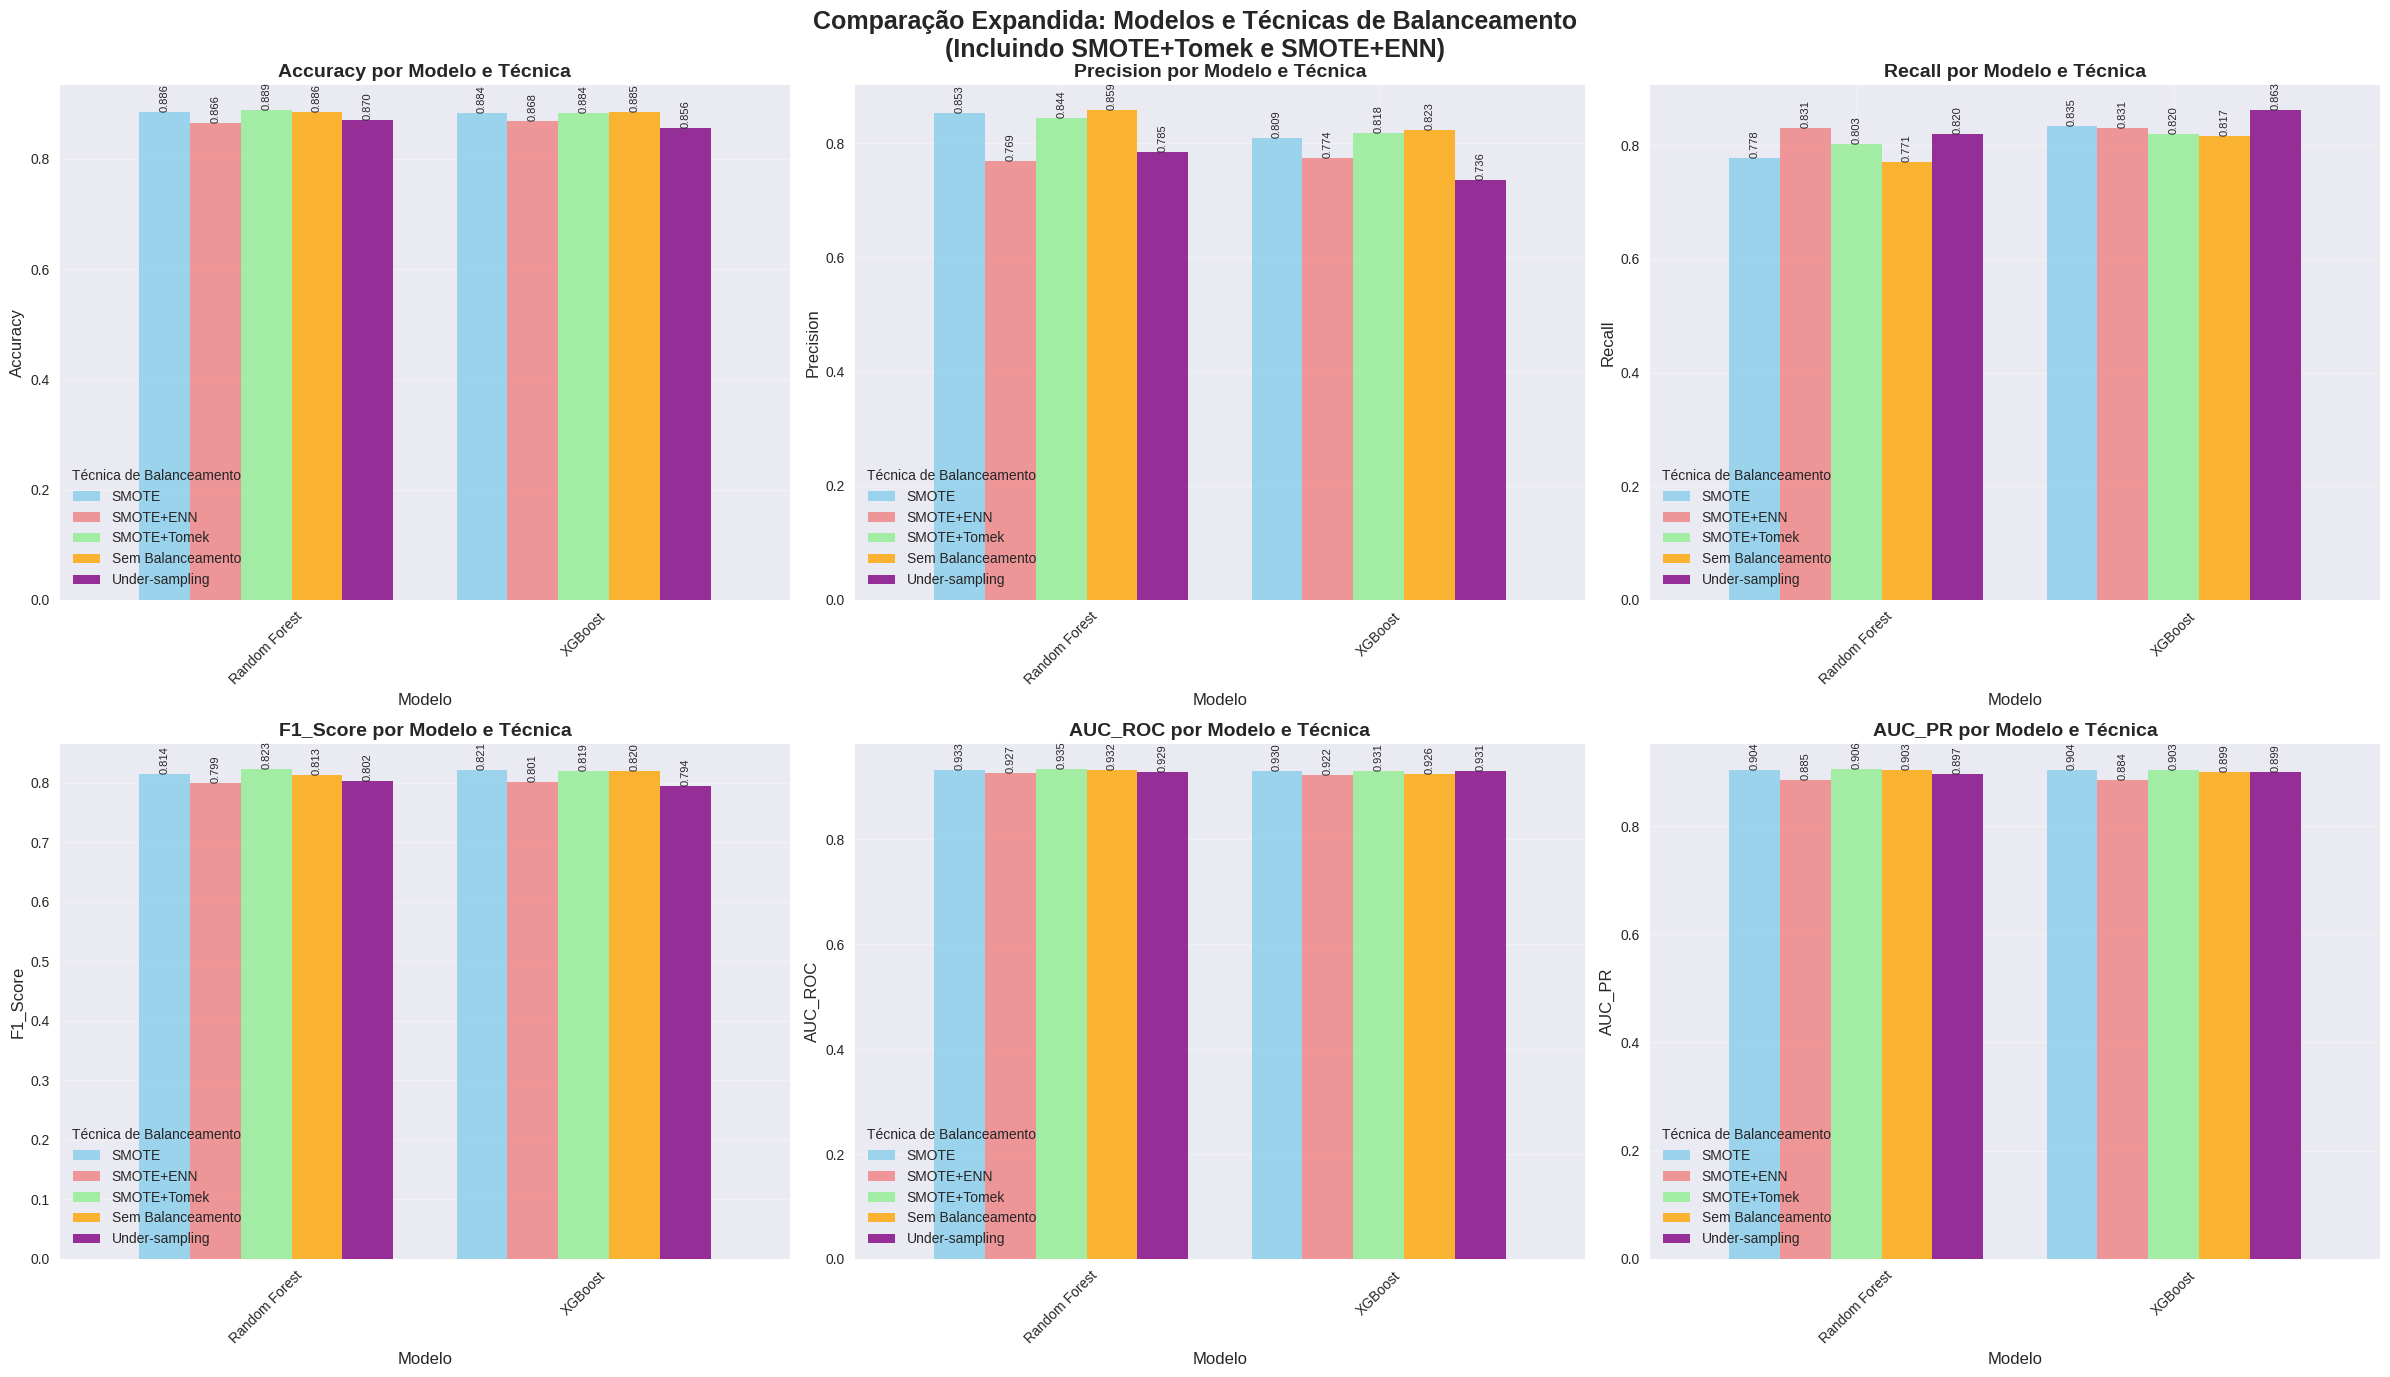

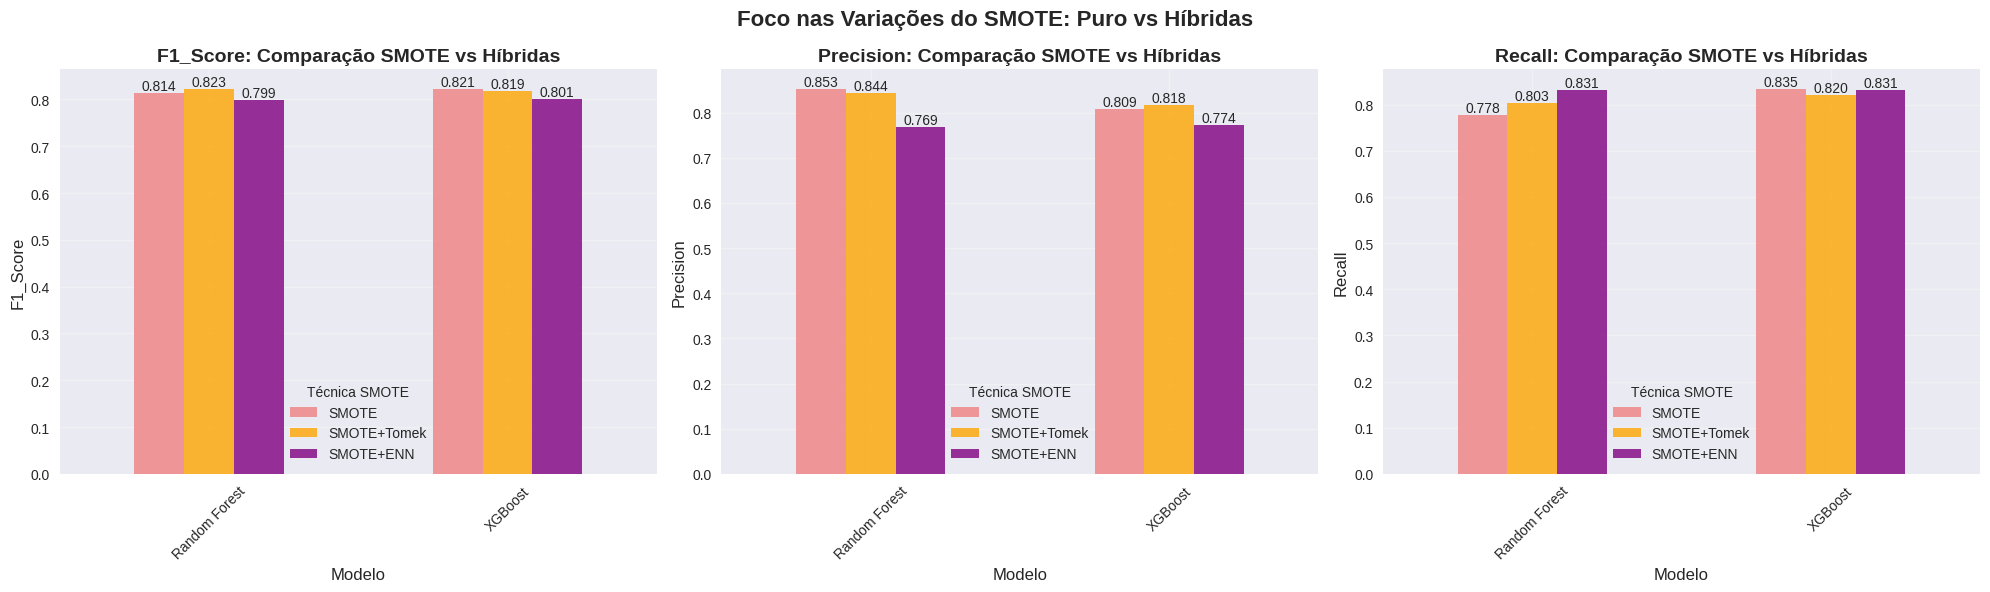

In [11]:
# ===== VISUALIZAÇÕES COMPARATIVAS =====
print("\n=== GERANDO VISUALIZAÇÕES EXPANDIDAS ===")

# Configurar subplots
fig, axes = plt.subplots(2, 3, figsize=(24, 14))
axes = axes.ravel()

metrics_viz = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'AUC_ROC', 'AUC_PR']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'purple']

for i, metric in enumerate(metrics_viz):
    pivot_data = results_df.pivot_table(
        index='Model',
        columns='Balance_Technique',
        values=metric
    )

    ax = axes[i]
    pivot_data.plot(kind='bar', ax=ax, color=colors, alpha=0.8, width=0.8)
    ax.set_title(f'{metric} por Modelo e Técnica', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('Modelo', fontsize=12)
    ax.legend(title='Técnica de Balanceamento', loc='best', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)


    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', fontsize=8, rotation=90)

plt.suptitle('Comparação Expandida: Modelos e Técnicas de Balanceamento\n(Incluindo SMOTE+Tomek e SMOTE+ENN)',
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Gráfico específico para comparar técnicas SMOTE
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
smote_techniques = ['SMOTE', 'SMOTE+Tomek', 'SMOTE+ENN']
smote_data = results_df[results_df['Balance_Technique'].isin(smote_techniques)]

key_metrics = ['F1_Score', 'Precision', 'Recall']
for i, metric in enumerate(key_metrics):
    pivot_data = smote_data.pivot_table(
        index='Model',
        columns='Balance_Technique',
        values=metric
    )[smote_techniques]

    ax = axes[i]
    pivot_data.plot(kind='bar', ax=ax, color=['lightcoral', 'orange', 'purple'], alpha=0.8)
    ax.set_title(f'{metric}: Comparação SMOTE vs Híbridas', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('Modelo', fontsize=12)
    ax.legend(title='Técnica SMOTE', loc='best')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

    # Adicionar valores nas barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', fontsize=10)

plt.suptitle('Foco nas Variações do SMOTE: Puro vs Híbridas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [12]:
# ===== IDENTIFICAÇÃO E ANÁLISE DO MELHOR MODELO =====
print("\n" + "="*50)
print(" IDENTIFICAÇÃO DO MELHOR MODELO")
print("="*50)

# Identificar melhor modelo baseado no F1-Score
best_model_idx = results_df['F1_Score'].idxmax()
best_result = results_df.loc[best_model_idx]

print(f"\n=== MELHOR MODELO IDENTIFICADO ===")
print(f"Algoritmo: {best_result['Model']}")
print(f"Técnica de Balanceamento: {best_result['Balance_Technique']}")
print(f"F1-Score: {best_result['F1_Score']:.3f} ({best_result['F1_Score']:.1%})")
print(f"AUC-ROC: {best_result['AUC_ROC']:.3f}")
print(f"Precisão: {best_result['Precision']:.3f} ({best_result['Precision']:.1%})")
print(f"Recall: {best_result['Recall']:.3f} ({best_result['Recall']:.1%})")

best_model_key = f"{best_result['Model']}_{best_result['Balance_Technique']}"
best_model = trained_models[best_model_key]

# Ranking das 5 melhores combinações
print(f"\n=== TOP 5 MELHORES COMBINAÇÕES (por F1-Score) ===")
top_5 = results_df.nlargest(5, 'F1_Score')[['Model', 'Balance_Technique', 'F1_Score', 'AUC_ROC', 'Precision', 'Recall']]
for i, (_, row) in enumerate(top_5.iterrows(), 1):
    print(f"{i}. {row['Model']} + {row['Balance_Technique']}")
    print(f"   F1: {row['F1_Score']:.3f}, AUC: {row['AUC_ROC']:.3f}, Prec: {row['Precision']:.3f}, Rec: {row['Recall']:.3f}")

# Comparação com modelo sem balanceamento
baseline_results = results_df[
    (results_df['Balance_Technique'] == 'Sem Balanceamento') &
    (results_df['Model'] == best_result['Model'])
]

if not baseline_results.empty:
    baseline = baseline_results.iloc[0]
    print(f"\n=== COMPARAÇÃO COM BASELINE (SEM BALANCEAMENTO) ===")
    print(f"Modelo: {best_result['Model']}")
    print(f"Melhoria no F1-Score: {best_result['F1_Score'] - baseline['F1_Score']:.3f} (+{((best_result['F1_Score'] - baseline['F1_Score'])/baseline['F1_Score']*100):.1f}%)")
    print(f"Melhoria no Recall: {best_result['Recall'] - baseline['Recall']:.3f} (+{((best_result['Recall'] - baseline['Recall'])/baseline['Recall']*100):.1f}%)")
    print(f"Variação na Precisão: {best_result['Precision'] - baseline['Precision']:.3f} ({((best_result['Precision'] - baseline['Precision'])/baseline['Precision']*100):+.1f}%)")

if best_result['Balance_Technique'] in ['SMOTE+Tomek', 'SMOTE+ENN']:

    # Comparar com SMOTE puro
    smote_equivalent = results_df[
        (results_df['Balance_Technique'] == 'SMOTE') &
        (results_df['Model'] == best_result['Model'])
    ]

    if not smote_equivalent.empty:
        smote_base = smote_equivalent.iloc[0]
        print(f"\n=== COMPARAÇÃO COM SMOTE PURO ===")
        print(f"Técnica híbrida vs SMOTE puro:")
        print(f"Melhoria no F1-Score: {best_result['F1_Score'] - smote_base['F1_Score']:.3f} ({((best_result['F1_Score'] - smote_base['F1_Score'])/smote_base['F1_Score']*100):+.1f}%)")
        print(f"Melhoria no Recall: {best_result['Recall'] - smote_base['Recall']:.3f} ({((best_result['Recall'] - smote_base['Recall'])/smote_base['Recall']*100):+.1f}%)")
        print(f"Variação na Precisão: {best_result['Precision'] - smote_base['Precision']:.3f} ({((best_result['Precision'] - smote_base['Precision'])/smote_base['Precision']*100):+.1f}%)")


 IDENTIFICAÇÃO DO MELHOR MODELO

=== MELHOR MODELO IDENTIFICADO ===
Algoritmo: Random Forest
Técnica de Balanceamento: SMOTE+Tomek
F1-Score: 0.823 (82.3%)
AUC-ROC: 0.935
Precisão: 0.844 (84.4%)
Recall: 0.803 (80.3%)

=== TOP 5 MELHORES COMBINAÇÕES (por F1-Score) ===
1. Random Forest + SMOTE+Tomek
   F1: 0.823, AUC: 0.935, Prec: 0.844, Rec: 0.803
2. XGBoost + SMOTE
   F1: 0.821, AUC: 0.930, Prec: 0.809, Rec: 0.835
3. XGBoost + Sem Balanceamento
   F1: 0.820, AUC: 0.926, Prec: 0.823, Rec: 0.817
4. XGBoost + SMOTE+Tomek
   F1: 0.819, AUC: 0.931, Prec: 0.818, Rec: 0.820
5. Random Forest + SMOTE
   F1: 0.814, AUC: 0.933, Prec: 0.853, Rec: 0.778

=== COMPARAÇÃO COM BASELINE (SEM BALANCEAMENTO) ===
Modelo: Random Forest
Melhoria no F1-Score: 0.010 (+1.3%)
Melhoria no Recall: 0.032 (+4.1%)
Variação na Precisão: -0.014 (-1.7%)

=== COMPARAÇÃO COM SMOTE PURO ===
Técnica híbrida vs SMOTE puro:
Melhoria no F1-Score: 0.009 (+1.1%)
Melhoria no Recall: 0.025 (+3.2%)
Variação na Precisão: -0.009 (-1.

In [13]:
# ===== VALIDAÇÃO CRUZADA DO MELHOR MODELO =====
print(f"\n=== VALIDAÇÃO CRUZADA - {best_model_key} ===")

# Determinar dados de treino para o melhor modelo
if best_result['Balance_Technique'] == 'SMOTE':
    X_train_best, y_train_best = X_train_smote, y_train_smote
elif best_result['Balance_Technique'] == 'Under-sampling':
    X_train_best, y_train_best = X_train_under, y_train_under
elif best_result['Balance_Technique'] == 'SMOTE+Tomek':
    X_train_best, y_train_best = X_train_smote_tomek, y_train_smote_tomek
elif best_result['Balance_Technique'] == 'SMOTE+ENN':
    X_train_best, y_train_best = X_train_smote_enn, y_train_smote_enn
else:
    X_train_best, y_train_best = X_train, y_train

# Validação cruzada estratificada (5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

print("Resultados da Validação Cruzada (5-fold):")
cv_results = {}

for metric in cv_metrics:
    scores = cross_val_score(best_model, X_train_best, y_train_best, cv=cv, scoring=metric)
    cv_results[metric] = scores
    print(f"{metric.capitalize():>12}: {scores.mean():.3f} ± {scores.std():.3f} (min: {scores.min():.3f}, max: {scores.max():.3f})")


=== VALIDAÇÃO CRUZADA - Random Forest_SMOTE+Tomek ===
Resultados da Validação Cruzada (5-fold):
    Accuracy: 0.901 ± 0.005 (min: 0.893, max: 0.906)
   Precision: 0.917 ± 0.010 (min: 0.900, max: 0.926)
      Recall: 0.883 ± 0.016 (min: 0.865, max: 0.911)
          F1: 0.899 ± 0.006 (min: 0.891, max: 0.906)
     Roc_auc: 0.963 ± 0.005 (min: 0.954, max: 0.968)



=== GERANDO VISUALIZAÇÕES AVANÇADAS ===


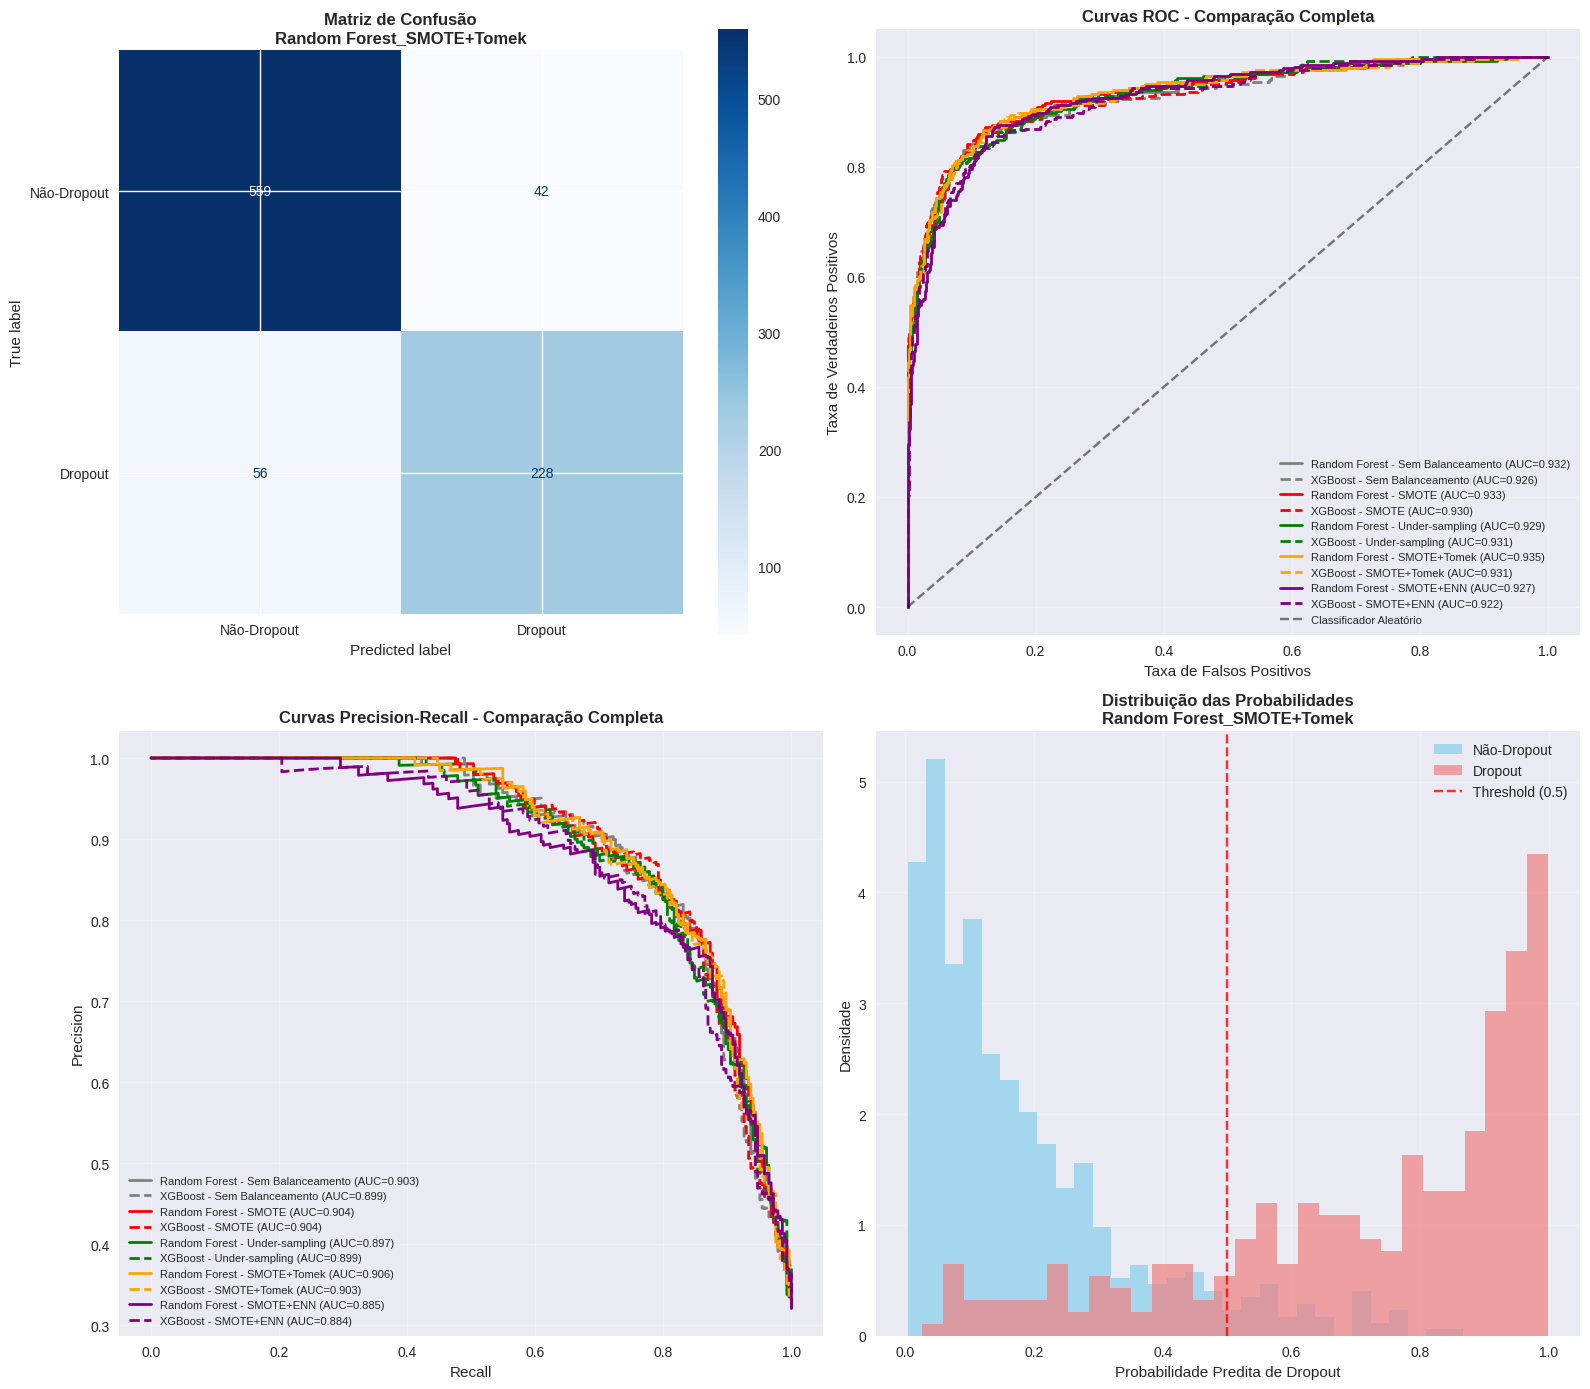

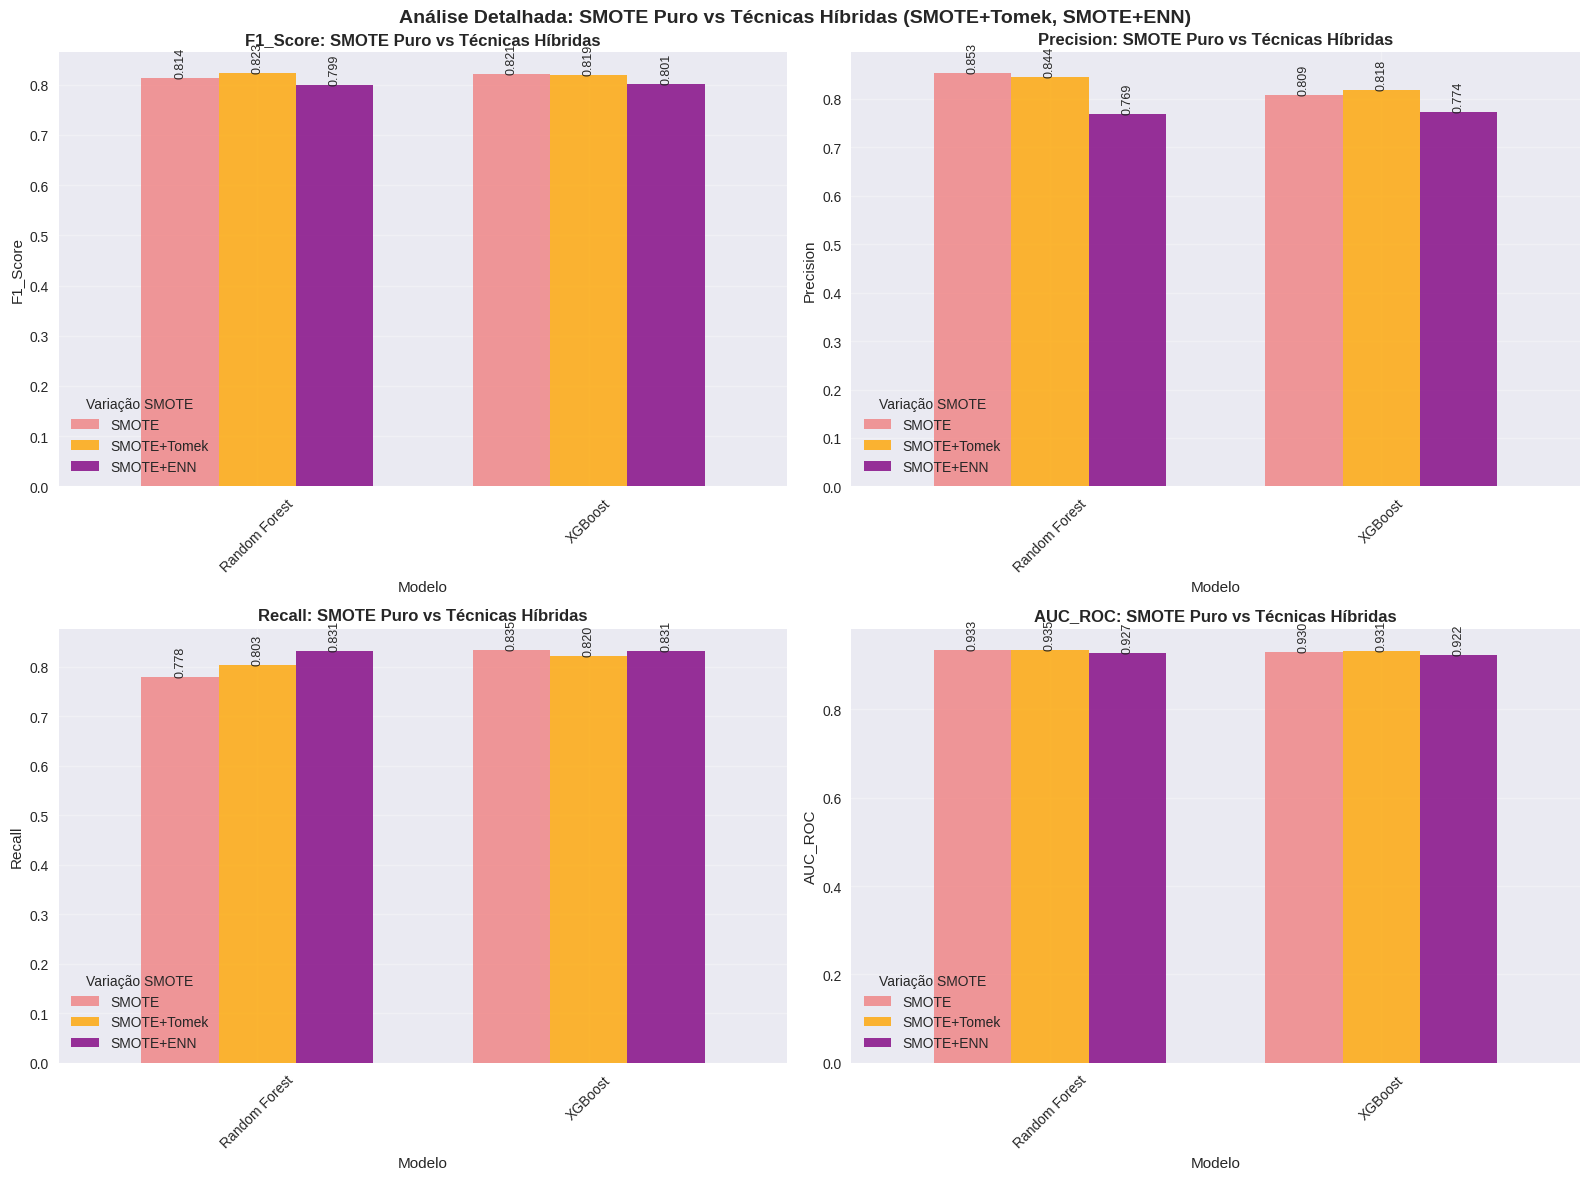

In [14]:
# ===== VISUALIZAÇÕES AVANÇADAS =====
print("\n=== GERANDO VISUALIZAÇÕES AVANÇADAS ===")

# Matriz de Confusão e análises do melhor modelo
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 14))

best_pred, best_proba = predictions[best_model_key]

# Subplot 1: Matriz de Confusão
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_test, best_pred,
    display_labels=['Não-Dropout', 'Dropout'],
    cmap='Blues',
    ax=ax1
)
ax1.set_title(f'Matriz de Confusão\n{best_model_key}', fontweight='bold', fontsize=12)

# Subplot 2: Curvas ROC (todas as técnicas)
technique_colors = {
    'Sem Balanceamento': 'gray',
    'SMOTE': 'red',
    'Under-sampling': 'green',
    'SMOTE+Tomek': 'orange',
    'SMOTE+ENN': 'purple'
}

for i, (balance_name, X_tr, y_tr) in enumerate(experiments):
    for model_name in models.keys():
        key = f"{model_name}_{balance_name}"
        if key in predictions:
            _, y_pred_proba = predictions[key]
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            auc_score = roc_auc_score(y_test, y_pred_proba)

            linestyle = '-' if model_name == 'Random Forest' else '--'
            color = technique_colors.get(balance_name, 'black')

            ax2.plot(fpr, tpr, linestyle=linestyle, linewidth=2, color=color,
                    label=f'{model_name} - {balance_name} (AUC={auc_score:.3f})')

ax2.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Classificador Aleatório')
ax2.set_xlabel('Taxa de Falsos Positivos', fontsize=11)
ax2.set_ylabel('Taxa de Verdadeiros Positivos', fontsize=11)
ax2.set_title('Curvas ROC - Comparação Completa', fontweight='bold', fontsize=12)
ax2.legend(fontsize=8, loc='lower right')
ax2.grid(True, alpha=0.3)

# Subplot 3: Curvas Precision-Recall
for i, (balance_name, X_tr, y_tr) in enumerate(experiments):
    for model_name in models.keys():
        key = f"{model_name}_{balance_name}"
        if key in predictions:
            _, y_pred_proba = predictions[key]
            precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
            auc_pr = average_precision_score(y_test, y_pred_proba)

            linestyle = '-' if model_name == 'Random Forest' else '--'
            color = technique_colors.get(balance_name, 'black')

            ax3.plot(recall_curve, precision_curve, linestyle=linestyle, linewidth=2, color=color,
                    label=f'{model_name} - {balance_name} (AUC={auc_pr:.3f})')

ax3.set_xlabel('Recall', fontsize=11)
ax3.set_ylabel('Precision', fontsize=11)
ax3.set_title('Curvas Precision-Recall - Comparação Completa', fontweight='bold', fontsize=12)
ax3.legend(fontsize=8, loc='lower left')
ax3.grid(True, alpha=0.3)

# Subplot 4: Distribuição das Probabilidades
best_proba_dropout = best_proba[y_test == 1]
best_proba_no_dropout = best_proba[y_test == 0]

ax4.hist(best_proba_no_dropout, alpha=0.7, bins=30, label='Não-Dropout', color='skyblue', density=True)
ax4.hist(best_proba_dropout, alpha=0.7, bins=30, label='Dropout', color='lightcoral', density=True)
ax4.axvline(0.5, color='red', linestyle='--', alpha=0.8, label='Threshold (0.5)')
ax4.set_xlabel('Probabilidade Predita de Dropout', fontsize=11)
ax4.set_ylabel('Densidade', fontsize=11)
ax4.set_title(f'Distribuição das Probabilidades\n{best_model_key}', fontweight='bold', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico adicional: Comparação das técnicas SMOTE em detalhes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

smote_variants = ['SMOTE', 'SMOTE+Tomek', 'SMOTE+ENN']
smote_comparison_data = results_df[results_df['Balance_Technique'].isin(smote_variants)]

detailed_metrics = ['F1_Score', 'Precision', 'Recall', 'AUC_ROC']
bar_colors = ['lightcoral', 'orange', 'purple']

for i, metric in enumerate(detailed_metrics):
    ax = axes[i]
    pivot_data = smote_comparison_data.pivot_table(
        index='Model',
        columns='Balance_Technique',
        values=metric
    )[smote_variants]  # Garantir ordem

    pivot_data.plot(kind='bar', ax=ax, color=bar_colors, alpha=0.8, width=0.7)
    ax.set_title(f'{metric}: SMOTE Puro vs Técnicas Híbridas', fontweight='bold', fontsize=12)
    ax.set_ylabel(metric, fontsize=11)
    ax.set_xlabel('Modelo', fontsize=11)
    ax.legend(title='Variação SMOTE', loc='best')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

    # Adicionar valores nas barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', fontsize=9, rotation=90)

plt.suptitle('Análise Detalhada: SMOTE Puro vs Técnicas Híbridas (SMOTE+Tomek, SMOTE+ENN)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


 GRÁFICOS RECOMENDADOS PARA O ARTIGO

=== GERANDO GRÁFICO 1: COMPARAÇÃO GERAL DAS MÉTRICAS ===


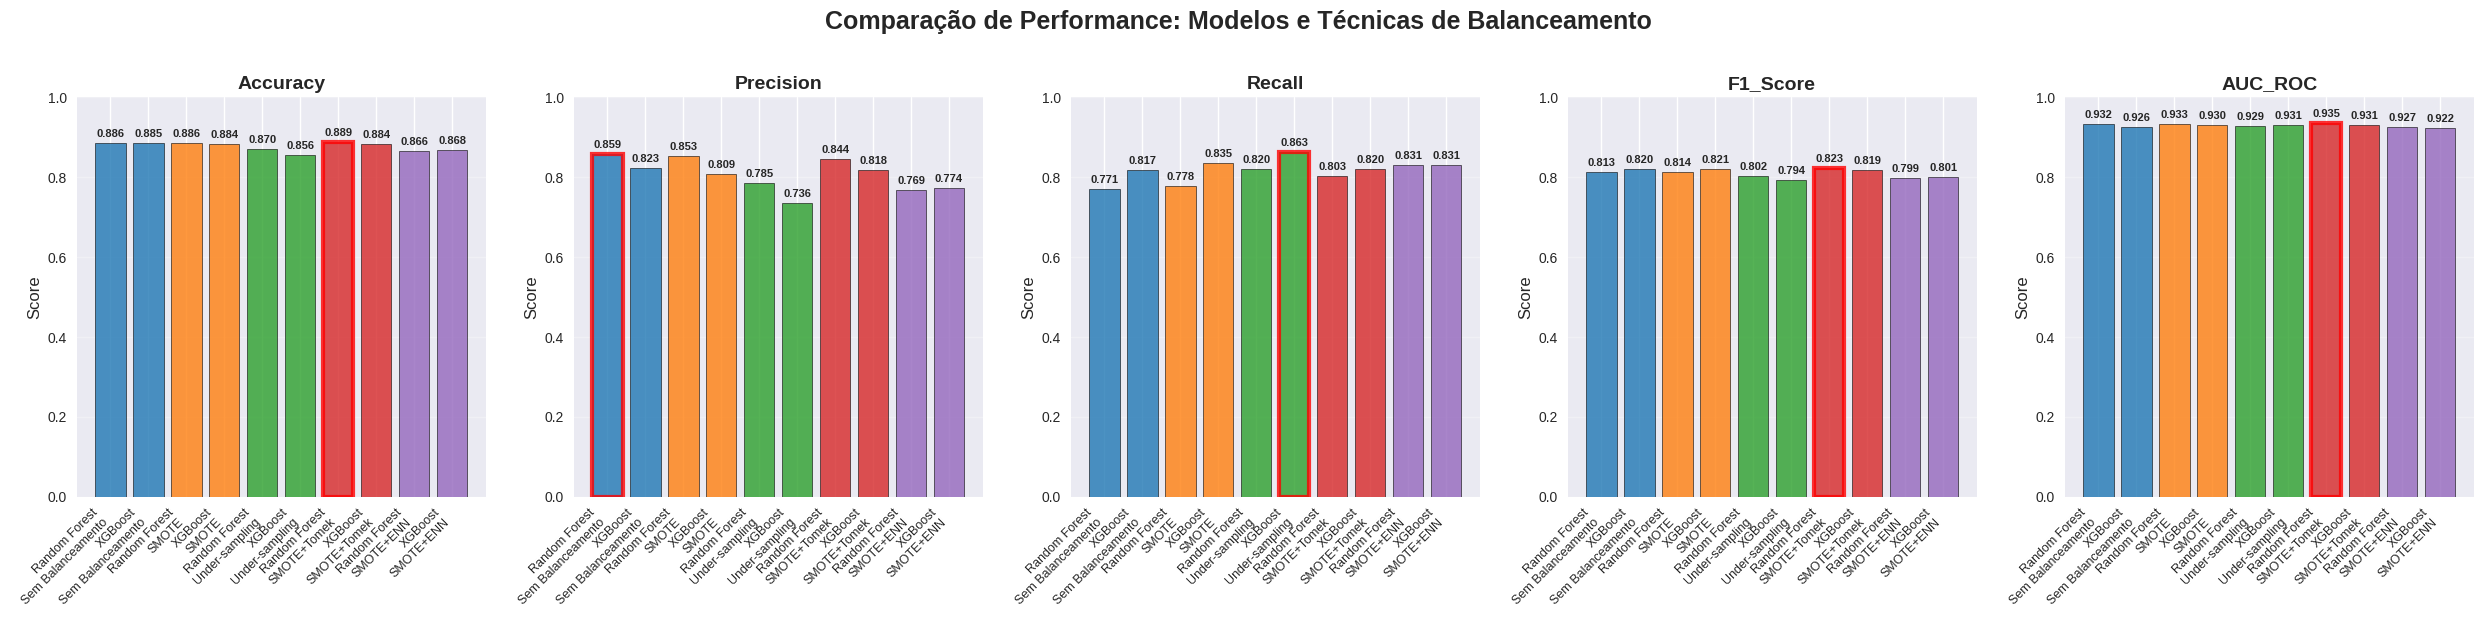


=== GERANDO GRÁFICO 2: MATRIZ DE CONFUSÃO DO MELHOR MODELO ===


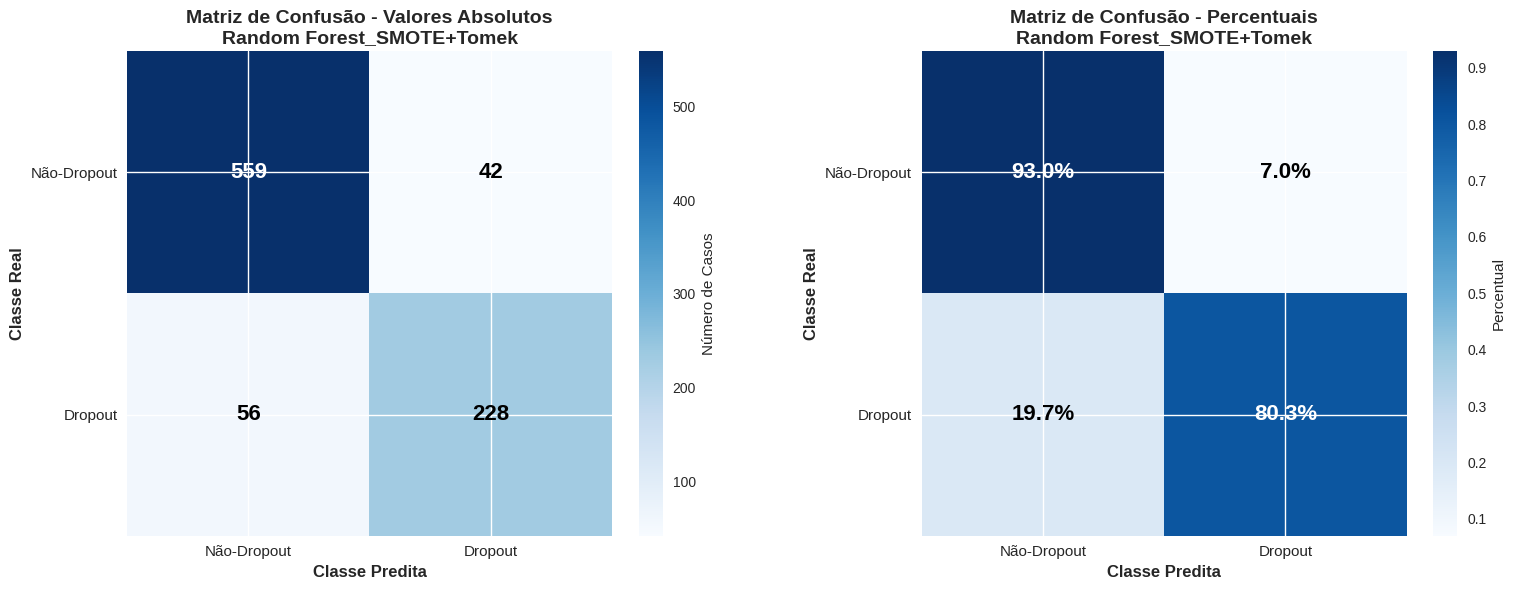


=== INFORMAÇÕES PARA INCLUSÃO NO TEXTO ===

Detalhes da Matriz de Confusão do Melhor Modelo:
Verdadeiros Negativos (TN): 559
Falsos Positivos (FP): 42
Falsos Negativos (FN): 56
Verdadeiros Positivos (TP): 228

Métricas Derivadas:
Sensibilidade (Recall): 0.803 (80.3%)
Especificidade: 0.930 (93.0%)
Valor Preditivo Positivo (Precisão): 0.844 (84.4%)
Valor Preditivo Negativo: 0.909 (90.9%)

Interpretação para o Artigo:
• O modelo identificou corretamente 228 casos de dropout de 284 casos reais
• A taxa de falsos positivos foi de 42 casos (7.0% dos não-dropouts)
• A taxa de falsos negativos foi de 56 casos (19.7% dos dropouts)

=== CÓDIGO PARA SALVAR OS GRÁFICOS ===

# Descomente as linhas abaixo para salvar os gráficos:

# plt.figure(1)  # Primeiro gráfico
# plt.savefig('comparacao_metricas_modelos.png', dpi=300, bbox_inches='tight')
# plt.savefig('comparacao_metricas_modelos.pdf', bbox_inches='tight')

# plt.figure(2)  # Segundo gráfico
# plt.savefig('matriz_confusao_melhor_modelo.png', 

In [15]:
# ===== GRÁFICOS PARA MELHOR ANÁLISE DE RESULTADOS =====
print("\n" + "="*60)
print(" GRÁFICOS RECOMENDADOS PARA O ARTIGO")
print("="*60)

# ===== GRÁFICO 1: COMPARAÇÃO GERAL DAS MÉTRICAS  =====
print("\n=== GERANDO GRÁFICO 1: COMPARAÇÃO GERAL DAS MÉTRICAS ===")

# Preparar dados para visualização
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'AUC_ROC']
techniques_order = ['Sem Balanceamento', 'SMOTE', 'Under-sampling', 'SMOTE+Tomek', 'SMOTE+ENN']

# Criar figura com subplots para cada métrica
fig, axes = plt.subplots(1, 5, figsize=(25, 6))
fig.suptitle('Comparação de Performance: Modelos e Técnicas de Balanceamento',
             fontsize=18, fontweight='bold', y=1.02)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
model_names = ['Random Forest', 'XGBoost']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]

    # Preparar dados para este métrica
    data_for_metric = []
    labels = []

    for technique in techniques_order:
        technique_data = results_df[results_df['Balance_Technique'] == technique]

        for model in model_names:
            model_data = technique_data[technique_data['Model'] == model]
            if not model_data.empty:
                value = model_data[metric].iloc[0]
                data_for_metric.append(value)
                labels.append(f"{model}\n{technique}")

    # Criar gráfico de barras
    x_pos = np.arange(len(data_for_metric))
    bars = ax.bar(x_pos, data_for_metric,
                  color=[colors[i//2] for i in range(len(data_for_metric))],
                  alpha=0.8, edgecolor='black', linewidth=0.5)

    # Destacar o melhor resultado
    best_idx = np.argmax(data_for_metric)
    bars[best_idx].set_edgecolor('red')
    bars[best_idx].set_linewidth(3)

    # Configurações do subplot
    ax.set_title(f'{metric}', fontsize=14, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0, 1)

    # Adicionar valores nas barras
    for i, (bar, value) in enumerate(zip(bars, data_for_metric)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.3f}', ha='center', va='bottom',
                fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# ===== GRÁFICO 2: MATRIZ DE CONFUSÃO DO MELHOR MODELO =====
print("\n=== GERANDO GRÁFICO 2: MATRIZ DE CONFUSÃO DO MELHOR MODELO ===")

# Obter predições do melhor modelo
best_model_key = f"{best_result['Model']}_{best_result['Balance_Technique']}"
best_pred, best_proba = predictions[best_model_key]

# Calcular matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_pred)

# Criar figura para matriz de confusão
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Matriz de Confusão (valores absolutos)
im1 = ax1.imshow(cm, interpolation='nearest', cmap='Blues')
ax1.set_title(f'Matriz de Confusão - Valores Absolutos\n{best_model_key}',
              fontsize=14, fontweight='bold')

# Adicionar valores nas células
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax1.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=16, fontweight='bold')

ax1.set_ylabel('Classe Real', fontsize=12, fontweight='bold')
ax1.set_xlabel('Classe Predita', fontsize=12, fontweight='bold')
ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_xticklabels(['Não-Dropout', 'Dropout'], fontsize=11)
ax1.set_yticklabels(['Não-Dropout', 'Dropout'], fontsize=11)

# Adicionar colorbar
cbar1 = plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
cbar1.set_label('Número de Casos', fontsize=11)

# Subplot 2: Matriz de Confusão (percentual)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
im2 = ax2.imshow(cm_percent, interpolation='nearest', cmap='Blues')
ax2.set_title(f'Matriz de Confusão - Percentuais\n{best_model_key}',
              fontsize=14, fontweight='bold')

# Adicionar valores percentuais nas células
thresh_percent = cm_percent.max() / 2.
for i in range(cm_percent.shape[0]):
    for j in range(cm_percent.shape[1]):
        ax2.text(j, i, f'{cm_percent[i, j]:.1%}',
                ha="center", va="center",
                color="white" if cm_percent[i, j] > thresh_percent else "black",
                fontsize=16, fontweight='bold')

ax2.set_ylabel('Classe Real', fontsize=12, fontweight='bold')
ax2.set_xlabel('Classe Predita', fontsize=12, fontweight='bold')
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xticklabels(['Não-Dropout', 'Dropout'], fontsize=11)
ax2.set_yticklabels(['Não-Dropout', 'Dropout'], fontsize=11)

# Adicionar colorbar
cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
cbar2.set_label('Percentual', fontsize=11)

plt.tight_layout()
plt.show()

# ===== INFORMAÇÕES ADICIONAIS PARA O TEXTO =====
print("\n=== INFORMAÇÕES PARA INCLUSÃO NO TEXTO ===")

# Calcular métricas adicionais da matriz de confusão
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)  # Recall
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)  # Precision
npv = tn / (tn + fn)

print(f"\nDetalhes da Matriz de Confusão do Melhor Modelo:")
print(f"Verdadeiros Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdadeiros Positivos (TP): {tp}")
print(f"\nMétricas Derivadas:")
print(f"Sensibilidade (Recall): {sensitivity:.3f} ({sensitivity:.1%})")
print(f"Especificidade: {specificity:.3f} ({specificity:.1%})")
print(f"Valor Preditivo Positivo (Precisão): {ppv:.3f} ({ppv:.1%})")
print(f"Valor Preditivo Negativo: {npv:.3f} ({npv:.1%})")

print(f"\nInterpretação para o Artigo:")
print(f"• O modelo identificou corretamente {tp} casos de dropout de {tp + fn} casos reais")
print(f"• A taxa de falsos positivos foi de {fp} casos ({fp/(tn+fp):.1%} dos não-dropouts)")
print(f"• A taxa de falsos negativos foi de {fn} casos ({fn/(tp+fn):.1%} dos dropouts)")

# ===== CÓDIGO PARA SALVAR OS GRÁFICOS (OPCIONAL) =====
print(f"\n=== CÓDIGO PARA SALVAR OS GRÁFICOS ===")
print("""
# Descomente as linhas abaixo para salvar os gráficos:

# plt.figure(1)  # Primeiro gráfico
# plt.savefig('comparacao_metricas_modelos.png', dpi=300, bbox_inches='tight')
# plt.savefig('comparacao_metricas_modelos.pdf', bbox_inches='tight')

# plt.figure(2)  # Segundo gráfico
# plt.savefig('matriz_confusao_melhor_modelo.png', dpi=300, bbox_inches='tight')
# plt.savefig('matriz_confusao_melhor_modelo.pdf', bbox_inches='tight')
""")

print("\n" + "="*60)
print(" GRÁFICOS RECOMENDADOS GERADOS COM SUCESSO!")
print("="*60)

In [16]:
# ===== ANÁLISE DE EXPLICABILIDADE COM LIME =====
print("\n" + "="*50)
print(" ANÁLISE DE EXPLICABILIDADE COM LIME")
print("="*50)

# Importar corretamente o explicador LIME
from lime.lime_tabular import LimeTabularExplainer

# Preparar explicador LIME
explainer = LimeTabularExplainer(
    training_data=X_train_best.values,
    feature_names=X_train_best.columns.tolist(),
    class_names=['Não-Dropout', 'Dropout'],
    mode='classification',
    discretize_continuous=True
)

# Selecionar casos para análise
dropout_indices = np.where(y_test == 1)[0]
no_dropout_indices = np.where(y_test == 0)[0]

print(f"Casos disponíveis para análise:")
print(f"  Dropout: {len(dropout_indices)} casos")
print(f"  Não-Dropout: {len(no_dropout_indices)} casos")

# Analisar casos específicos
print(f"\n=== ANÁLISE DE CASOS DE DROPOUT ===")
print(f"Modelo usado para explicabilidade: {best_model_key}")

# Casos de Dropout
for i in range(min(3, len(dropout_indices))):
    idx = dropout_indices[i]
    print(f"\n--- Caso de Dropout {i+1} (Índice: {idx}) ---")

    # Predição do modelo
    predicted_proba = best_model.predict_proba(X_test.iloc[[idx]])[0]
    predicted_class = best_model.predict(X_test.iloc[[idx]])[0]

    print(f"Predição do modelo: {'Dropout' if predicted_class == 1 else 'Não-Dropout'}")
    print(f"Probabilidades: Não-Dropout={predicted_proba[0]:.3f}, Dropout={predicted_proba[1]:.3f}")

    # Explicação LIME
    explanation = explainer.explain_instance(
        X_test.iloc[idx].values,
        best_model.predict_proba,
        num_features=10
    )

    print("Top 10 fatores mais importantes:")
    for j, (feature, importance) in enumerate(explanation.as_list(), 1):
        direction = "↗️" if importance > 0 else "↘️"
        print(f"  {j:2d}. {feature} {direction} {importance:+.3f}")

print(f"\n=== ANÁLISE DE CASOS DE NÃO-DROPOUT ===")

# Casos de Não-Dropout
for i in range(min(2, len(no_dropout_indices))):
    idx = no_dropout_indices[i]
    print(f"\n--- Caso de Não-Dropout {i+1} (Índice: {idx}) ---")

    # Predição do modelo
    predicted_proba = best_model.predict_proba(X_test.iloc[[idx]])[0]
    predicted_class = best_model.predict(X_test.iloc[[idx]])[0]

    print(f"Predição do modelo: {'Dropout' if predicted_class == 1 else 'Não-Dropout'}")
    print(f"Probabilidades: Não-Dropout={predicted_proba[0]:.3f}, Dropout={predicted_proba[1]:.3f}")

    # Explicação LIME
    explanation = explainer.explain_instance(
        X_test.iloc[idx].values,
        best_model.predict_proba,
        num_features=10
    )

    print("Top 10 fatores mais importantes:")
    for j, (feature, importance) in enumerate(explanation.as_list(), 1):
        direction = "↗️" if importance > 0 else "↘️"
        print(f"  {j:2d}. {feature} {direction} {importance:+.3f}")



 ANÁLISE DE EXPLICABILIDADE COM LIME
Casos disponíveis para análise:
  Dropout: 284 casos
  Não-Dropout: 601 casos

=== ANÁLISE DE CASOS DE DROPOUT ===
Modelo usado para explicabilidade: Random Forest_SMOTE+Tomek

--- Caso de Dropout 1 (Índice: 2) ---
Predição do modelo: Dropout
Probabilidades: Não-Dropout=0.175, Dropout=0.825
Top 10 fatores mais importantes:
   1. -1.47 < Curricular units 2nd sem (approved) <= -0.14 ↗️ +0.107
   2. Age at enrollment > 0.40 ↗️ +0.051
   3. Curricular units 1st sem (grade) > 0.51 ↘️ -0.047
   4. -1.20 < Curricular units 1st sem (approved) <= 0.09 ↗️ +0.043
   5. Scholarship holder <= -0.57 ↗️ +0.040
   6. Debtor <= -0.36 ↘️ -0.030
   7. Course <= -0.90 ↘️ -0.030
   8. Nacionality <= -0.15 ↗️ +0.022
   9. International <= -0.16 ↗️ +0.015
  10. 0.30 < Curricular units 2nd sem (grade) <= 0.54 ↘️ -0.015

--- Caso de Dropout 2 (Índice: 4) ---
Predição do modelo: Dropout
Probabilidades: Não-Dropout=0.131, Dropout=0.869
Top 10 fatores mais importantes:
   1. 

 Reprodutividade configurada com seed: 42
Iniciando análise LIME completa com reprodutividade...
 Seed global: 42
 Criando LIME Explainer com seed: 42

 ANÁLISE LIME COMPLETA - FATORES DE EVASÃO
 Usando seed: 42 para reprodutividade
Analisando 80 casos de Dropout e 80 casos de Não-Dropout
Índices Dropout: [2 4 6 7 9]... (primeiros 5)
Índices No-Dropout: [0 1 3 5 8]... (primeiros 5)

Processando casos de Dropout...
  Progresso: 1/80
  Progresso: 21/80
  Progresso: 41/80
  Progresso: 61/80
Processando casos de Não-Dropout...
  Progresso: 1/80
  Progresso: 21/80
  Progresso: 41/80
  Progresso: 61/80

Resultados:
  Fatores únicos encontrados em Dropout: 56
  Fatores únicos encontrados em Não-Dropout: 55


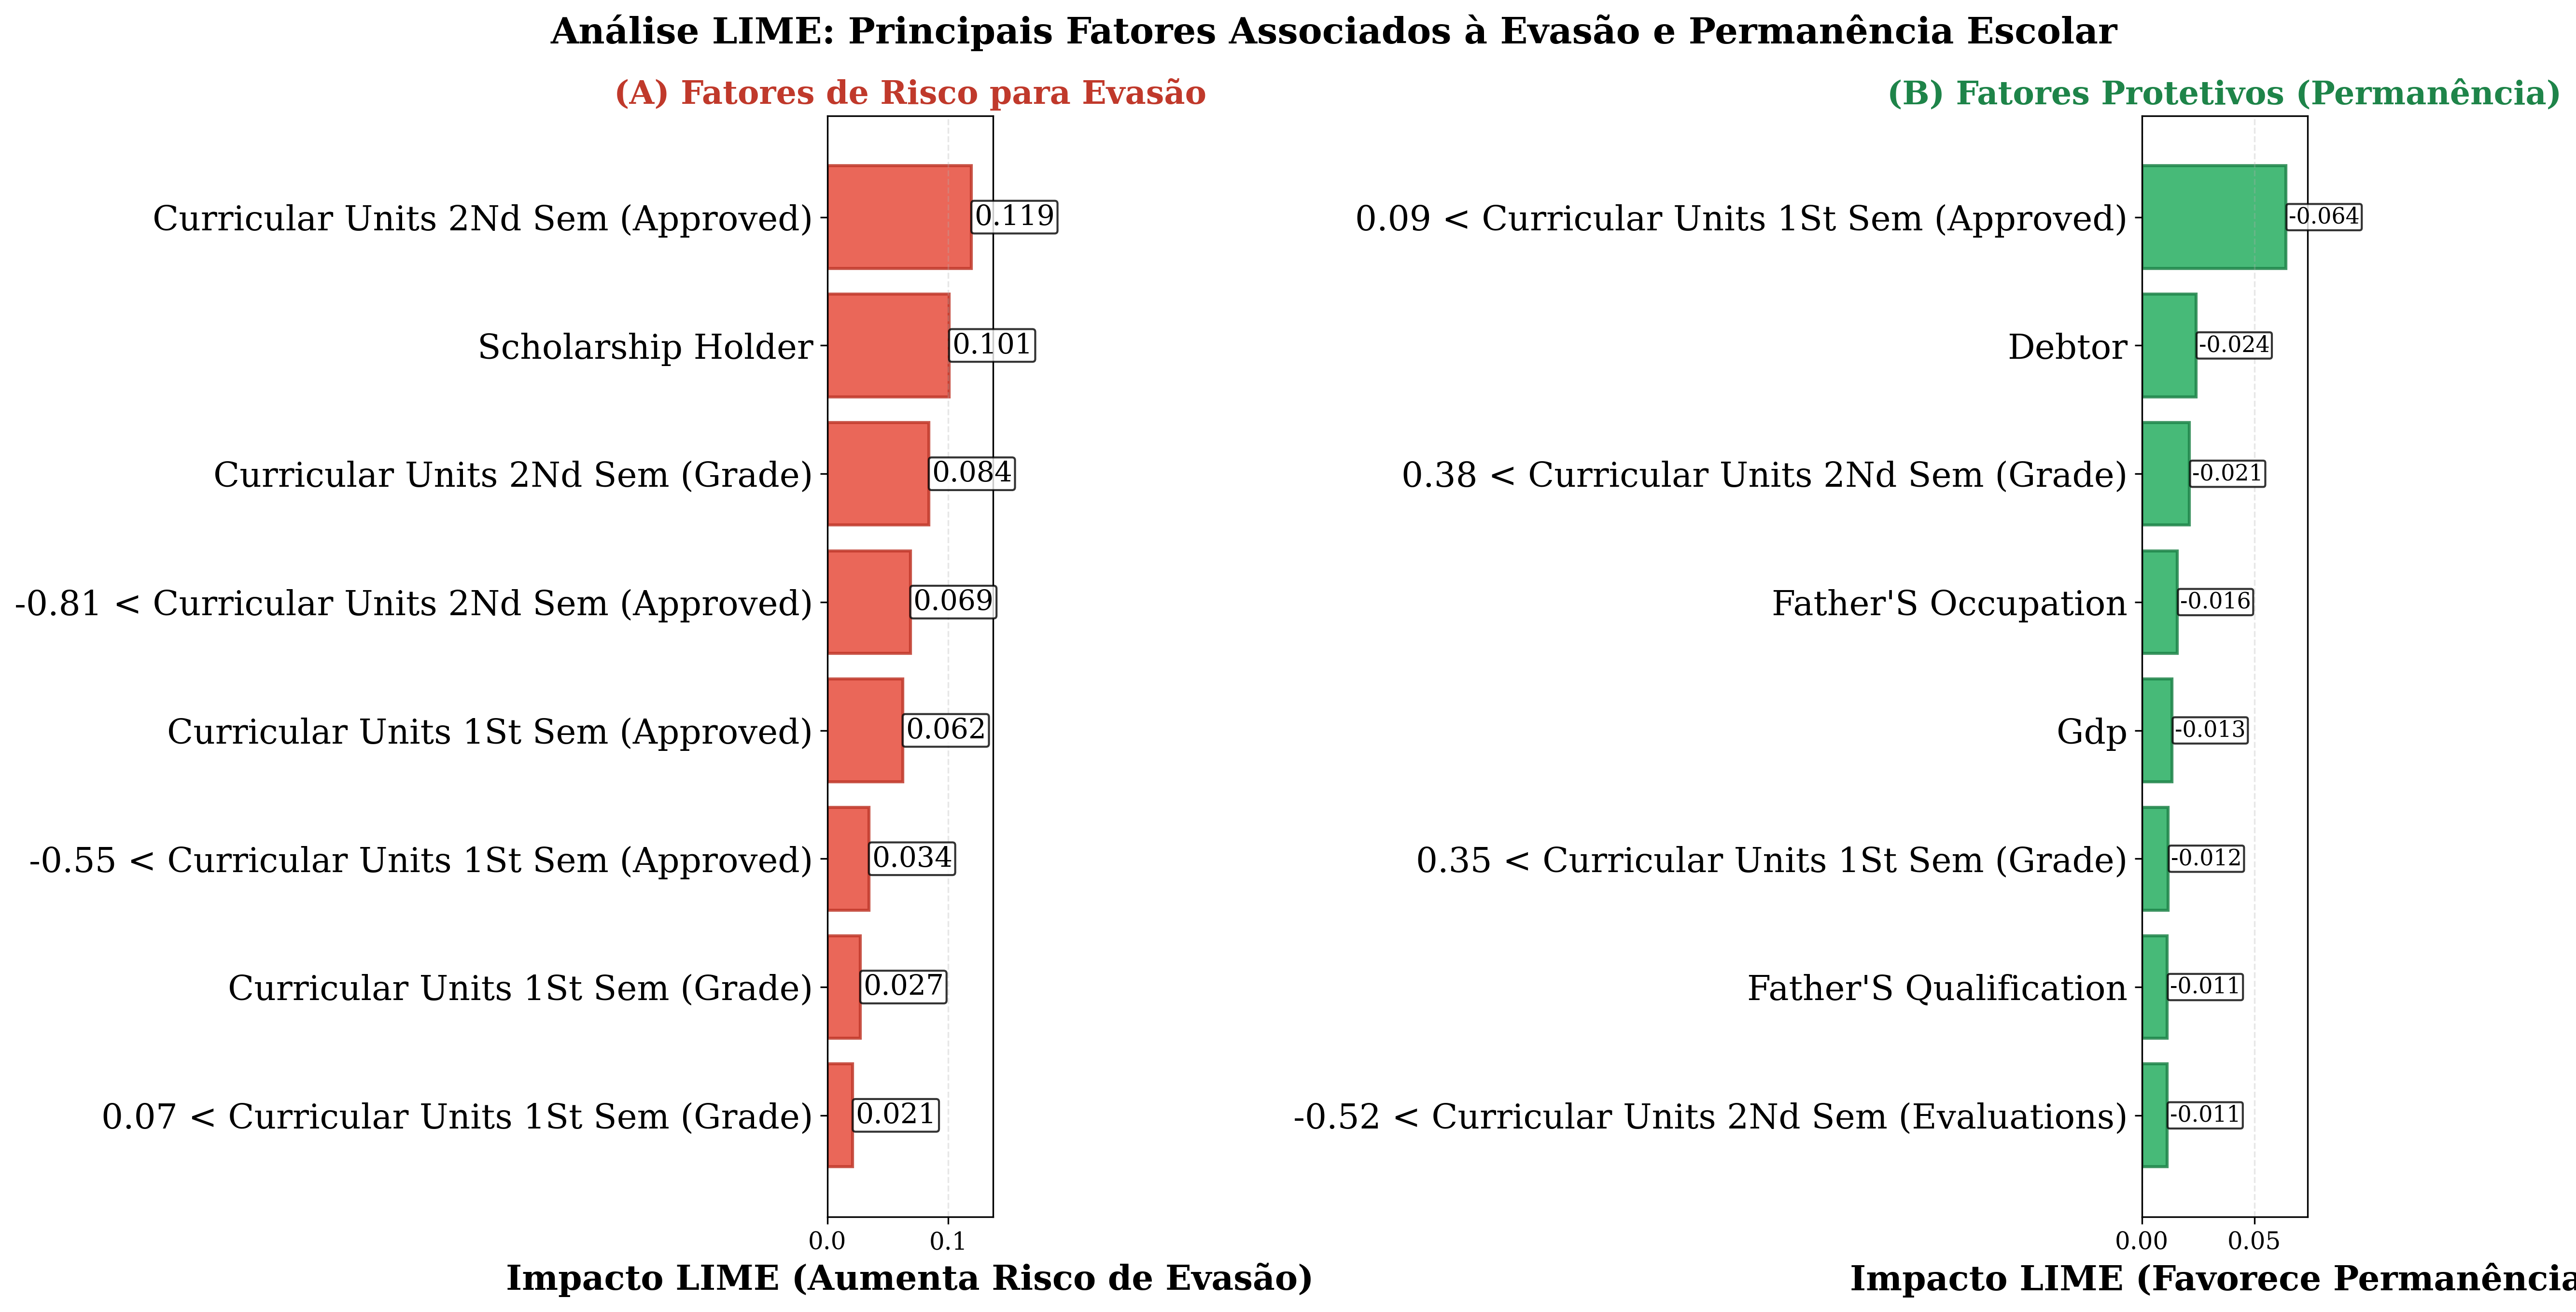


 Figuras salvas com seed 42!

 RELATÓRIO RESUMO - ANÁLISE LIME

 TOP 5 FATORES DE RISCO (Aumentam Evasão):
  1. Curricular Units 2Nd Sem (Approved): +0.119
  2. Scholarship Holder: +0.101
  3. Curricular Units 2Nd Sem (Grade): +0.084
  4. -0.81 < Curricular Units 2Nd Sem (Approved): +0.069
  5. Curricular Units 1St Sem (Approved): +0.062

 TOP 5 FATORES PROTETIVOS (Favorecem Permanência):
  1. 0.09 < Curricular Units 1St Sem (Approved): -0.064
  2. Debtor: -0.024
  3. 0.38 < Curricular Units 2Nd Sem (Grade): -0.021
  4. Father'S Occupation: -0.016
  5. Gdp: -0.013

 ESTATÍSTICAS GERAIS:
  • Total de fatores únicos: 62
  • Fatores de risco identificados: 34
  • Fatores protetivos identificados: 22
  • Balanceamento risco/proteção: 1.55
 Resultados salvos em: lime_results_seed42_20250809_220738.json

 Análise LIME concluída com sucesso!
   • 56 fatores analisados para casos de evasão
   • 55 fatores analisados para casos de permanência
   • Seed utilizada: 42


In [17]:
# ===== ANÁLISE LIME COMPLETA =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
from lime.lime_tabular import LimeTabularExplainer
import random

RANDOM_SEED = 42

# Definir seeds para todas as bibliotecas de aleatoriedade
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

print(f" Reprodutividade configurada com seed: {RANDOM_SEED}")

# Configurar estilo para publicação acadêmica
plt.style.use('default')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 17 # Aumentado de 20 para 14 (mais apropriado)
plt.rcParams['axes.titlesize'] = 16  # Aumentado
plt.rcParams['axes.labelsize'] = 14  # Aumentado
plt.rcParams['xtick.labelsize'] = 12  # Aumentado
plt.rcParams['ytick.labelsize'] = 12  # Aumentado - CHAVE PARA LEGENDA LATERAL
plt.rcParams['font.family'] = 'serif'

def analyze_lime_factors_complete(explainer, X_test, y_test, best_model, best_model_key, num_samples=100, random_seed=42):
    """
    Análise LIME com reprodutividade garantida

    Args:
        explainer: Explainer LIME configurado
        X_test: Dados de teste
        y_test: Labels de teste
        best_model: Modelo treinado
        best_model_key: Nome do modelo
        num_samples: Número de amostras a analisar
        random_seed: Seed para reprodutividade
    """
    print(f"\n{'='*60}")
    print(" ANÁLISE LIME COMPLETA - FATORES DE EVASÃO")
    print(f"{'='*60}")
    print(f" Usando seed: {random_seed} para reprodutividade")

    # Garantir reprodutividade local
    np.random.seed(random_seed)
    random.seed(random_seed)

    dropout_indices = np.where(y_test == 1)[0]
    no_dropout_indices = np.where(y_test == 0)[0]

    n_dropout = min(num_samples, len(dropout_indices))
    n_no_dropout = min(num_samples, len(no_dropout_indices))

    # MUDANÇA CRÍTICA: Usar ordenação + slice ao invés de choice aleatório
    # Isso garante sempre os mesmos índices
    dropout_sample = np.sort(dropout_indices)[:n_dropout]
    no_dropout_sample = np.sort(no_dropout_indices)[:n_no_dropout]

    # Alternativa se quiser manter aleatoriedade mas com reprodutividade:
    # np.random.seed(random_seed)
    # dropout_sample = np.random.choice(dropout_indices, size=n_dropout, replace=False)
    # np.random.seed(random_seed + 1)  # Seed diferente para no_dropout
    # no_dropout_sample = np.random.choice(no_dropout_indices, size=n_no_dropout, replace=False)

    print(f"Analisando {n_dropout} casos de Dropout e {n_no_dropout} casos de Não-Dropout")
    print(f"Índices Dropout: {dropout_sample[:5]}... (primeiros 5)")
    print(f"Índices No-Dropout: {no_dropout_sample[:5]}... (primeiros 5)")

    dropout_factors = defaultdict(list)
    no_dropout_factors = defaultdict(list)

    print("\nProcessando casos de Dropout...")
    for i, idx in enumerate(dropout_sample):
        if i % 20 == 0:
            print(f"  Progresso: {i+1}/{len(dropout_sample)}")
        try:
            # Definir seed específica para cada explicação
            explanation = explainer.explain_instance(
                X_test.iloc[idx].values,
                best_model.predict_proba,
                num_features=15,
                num_samples=5000  # Fixar número de samples para consistência
            )
            for feature, importance in explanation.as_list():
                clean_feature = feature.split('<=')[0].split('>')[0].split('=')[0].strip()
                dropout_factors[clean_feature].append(importance)
        except Exception as e:
            print(f"  Erro no caso {idx}: {e}")
            continue

    print("Processando casos de Não-Dropout...")
    for i, idx in enumerate(no_dropout_sample):
        if i % 20 == 0:
            print(f"  Progresso: {i+1}/{len(no_dropout_sample)}")
        try:
            explanation = explainer.explain_instance(
                X_test.iloc[idx].values,
                best_model.predict_proba,
                num_features=15,
                num_samples=5000  # Fixar número de samples para consistência
            )
            for feature, importance in explanation.as_list():
                clean_feature = feature.split('<=')[0].split('>')[0].split('=')[0].strip()
                no_dropout_factors[clean_feature].append(importance)
        except Exception as e:
            print(f"  Erro no caso {idx}: {e}")
            continue

    # Calcular médias com ordenação determinística
    dropout_avg_impact = {}
    for feature in sorted(dropout_factors.keys()):  # Ordenação para consistência
        impacts = dropout_factors[feature]
        if len(impacts) >= 3:
            dropout_avg_impact[feature] = np.mean(impacts)

    no_dropout_avg_impact = {}
    for feature in sorted(no_dropout_factors.keys()):  # Ordenação para consistência
        impacts = no_dropout_factors[feature]
        if len(impacts) >= 3:
            no_dropout_avg_impact[feature] = np.mean(impacts)

    print(f"\nResultados:")
    print(f"  Fatores únicos encontrados em Dropout: {len(dropout_avg_impact)}")
    print(f"  Fatores únicos encontrados em Não-Dropout: {len(no_dropout_avg_impact)}")

    return dropout_avg_impact, no_dropout_avg_impact

def create_lime_explainer_reproducible(X_train, feature_names, random_seed=42):
    """
    Criar explainer LIME com configurações reproduzíveis
    """
    print(f" Criando LIME Explainer com seed: {random_seed}")

    explainer = LimeTabularExplainer(
        X_train.values,
        feature_names=feature_names,
        class_names=['No Dropout', 'Dropout'],
        mode='classification',
        discretize_continuous=True,
        random_state=random_seed  # CRÍTICO: Definir random_state
    )

    return explainer

def create_lime_article_figure(dropout_impacts, no_dropout_impacts, best_model_key):
    """
    Criar figura para artigo com formato mais quadrado e legenda lateral maior
    """
    # Garantir ordenação determinística
    risk_factors = {k: v for k, v in sorted(dropout_impacts.items()) if v > 0}
    top_risk = dict(sorted(risk_factors.items(), key=lambda x: x[1], reverse=True)[:8])

    protective_factors = {k: v for k, v in sorted(dropout_impacts.items()) if v < 0}
    top_protective = dict(sorted(protective_factors.items(), key=lambda x: x[1])[:8])

    def clean_feature_name(feature_name, max_length=40):  # Aumentado de 25 para 40
        """Limpar e formatar nomes das features - SEM TRUNCAR"""
        clean_name = feature_name.replace('_', ' ').title()
        # Remover a limitação de caracteres para mostrar nome completo
        return clean_name

    # FORMATO MAIS QUADRADO: Alterado de (16, 9) para (14, 10)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 10))

    if top_risk:
        factors_risk = [clean_feature_name(k) for k in top_risk.keys()]
        values_risk = list(top_risk.values())
        bars1 = ax1.barh(range(len(factors_risk)), values_risk, color='#E74C3C', alpha=0.85, edgecolor='#C0392B', linewidth=1.5)
        ax1.set_yticks(range(len(factors_risk)))
        ax1.set_yticklabels(factors_risk, fontsize=17)  # Aumentado explicitamente
        ax1.set_xlabel('Impacto LIME (Aumenta Risco de Evasão)', fontweight='bold', fontsize=17)
        ax1.set_title('(A) Fatores de Risco para Evasão', fontweight='bold', color='#C0392B', fontsize=16)
        ax1.grid(True, alpha=0.3, axis='x', linestyle='--')
        ax1.invert_yaxis()
        for i, v in enumerate(values_risk):
            ax1.text(v + max(values_risk)*0.02, i, f'{v:.3f}', va='center', ha='left', fontsize=14,
                     bbox=dict(boxstyle="round,pad=0.1", facecolor='white', alpha=0.8))
        ax1.set_xlim(0, max(values_risk) * 1.15)

    if top_protective:
        factors_prot = [clean_feature_name(k) for k in top_protective.keys()]
        values_prot = [abs(v) for v in top_protective.values()]
        bars2 = ax2.barh(range(len(factors_prot)), values_prot, color='#27AE60', alpha=0.85, edgecolor='#1E8449', linewidth=1.5)
        ax2.set_yticks(range(len(factors_prot)))
        ax2.set_yticklabels(factors_prot, fontsize=17)  # Aumentado explicitamente
        ax2.set_xlabel('Impacto LIME (Favorece Permanência)', fontweight='bold', fontsize=17)
        ax2.set_title('(B) Fatores Protetivos (Permanência)', fontweight='bold', color='#1E8449', fontsize=16)
        ax2.grid(True, alpha=0.3, axis='x', linestyle='--')
        ax2.invert_yaxis()
        for i, (factor, original_val) in enumerate(top_protective.items()):
            ax2.text(abs(original_val) + max(values_prot)*0.02, i, f'{original_val:.3f}', va='center', ha='left', fontsize=11,
                     bbox=dict(boxstyle="round,pad=0.1", facecolor='white', alpha=0.8))
        ax2.set_xlim(0, max(values_prot) * 1.15)

    plt.suptitle('Análise LIME: Principais Fatores Associados à Evasão e Permanência Escolar',
                 fontsize=18, fontweight='bold', y=0.95)

    # AJUSTE CRÍTICO: Aumentar margem esquerda para acomodar legendas maiores
    plt.tight_layout()
    plt.subplots_adjust(top=0.88, left=0.25, right=0.98, bottom=0.12)  # left aumentado de 0.12 para 0.25

    return fig

def generate_lime_summary_report(dropout_impacts, no_dropout_impacts):
    """Gerar relatório resumo (sem alterações necessárias)"""
    print(f"\n{'='*60}")
    print(" RELATÓRIO RESUMO - ANÁLISE LIME")
    print(f"{'='*60}")

    # Garantir ordenação determinística
    risk_factors = {k: v for k, v in sorted(dropout_impacts.items()) if v > 0}
    top_risk = sorted(risk_factors.items(), key=lambda x: x[1], reverse=True)[:5]

    print(f"\n TOP 5 FATORES DE RISCO (Aumentam Evasão):")
    for i, (factor, impact) in enumerate(top_risk, 1):
        print(f"  {i}. {factor.replace('_', ' ').title()}: +{impact:.3f}")

    protective_factors = {k: v for k, v in sorted(dropout_impacts.items()) if v < 0}
    top_protective = sorted(protective_factors.items(), key=lambda x: x[1])[:5]

    print(f"\n TOP 5 FATORES PROTETIVOS (Favorecem Permanência):")
    for i, (factor, impact) in enumerate(top_protective, 1):
        print(f"  {i}. {factor.replace('_', ' ').title()}: {impact:.3f}")

    total_factors = len(set(dropout_impacts.keys()) | set(no_dropout_impacts.keys()))
    risk_count = len(risk_factors)
    protective_count = len(protective_factors)

    print(f"\n ESTATÍSTICAS GERAIS:")
    print(f"  • Total de fatores únicos: {total_factors}")
    print(f"  • Fatores de risco identificados: {risk_count}")
    print(f"  • Fatores protetivos identificados: {protective_count}")
    print(f"  • Balanceamento risco/proteção: {(risk_count/protective_count if protective_count else 0):.2f}")

def save_results_for_reproducibility(dropout_impacts, no_dropout_impacts, filename="lime_results_seed42.json"):
    """
    Salvar resultados para verificação de reprodutividade
    """
    import json

    results = {
        'seed_used': RANDOM_SEED,
        'dropout_impacts': dropout_impacts,
        'no_dropout_impacts': no_dropout_impacts,
        'execution_info': {
            'numpy_version': np.__version__,
            'total_dropout_factors': len(dropout_impacts),
            'total_no_dropout_factors': len(no_dropout_impacts)
        }
    }

    with open(filename, 'w') as f:
        json.dump(results, f, indent=2)

    print(f" Resultados salvos em: {filename}")

def execute_lime_analysis_complete(random_seed=42):
    """
    Executar análise LIME completa com reprodutividade garantida
    """
    print("Iniciando análise LIME completa com reprodutividade...")
    print(f" Seed global: {random_seed}")

    # Definir seed global novamente
    np.random.seed(random_seed)
    random.seed(random_seed)

    required_vars = ['X_test', 'y_test', 'best_model', 'best_model_key', 'X_train']
    missing_vars = [var for var in required_vars if var not in globals()]

    if missing_vars:
        print(f" Variáveis não encontradas: {missing_vars}")
        print("Certifique-se de executar primeiro as seções anteriores do código.")
        print("NECESSÁRIO: X_train, X_test, y_test, best_model, best_model_key")
        return None, None

    try:
        # Criar explainer com reprodutividade
        feature_names = X_test.columns.tolist()
        explainer = create_lime_explainer_reproducible(X_train, feature_names, random_seed)

        # Executar análise
        dropout_impacts, no_dropout_impacts = analyze_lime_factors_complete(
            explainer, X_test, y_test, best_model, best_model_key,
            num_samples=80, random_seed=random_seed
        )

        # Criar e salvar figuras
        fig = create_lime_article_figure(dropout_impacts, no_dropout_impacts, best_model_key)
        plt.show()

        # Salvar com timestamp para evitar sobrescrita
        from datetime import datetime
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

        fig.savefig(f'lime_fatores_evasao_seed{random_seed}_{timestamp}.png', dpi=300, bbox_inches='tight', facecolor='white')
        fig.savefig(f'lime_fatores_evasao_seed{random_seed}_{timestamp}.pdf', bbox_inches='tight', facecolor='white')

        print(f"\n Figuras salvas com seed {random_seed}!")

        # Gerar relatório
        generate_lime_summary_report(dropout_impacts, no_dropout_impacts)

        # Salvar resultados para verificação
        save_results_for_reproducibility(dropout_impacts, no_dropout_impacts,
                                       f"lime_results_seed{random_seed}_{timestamp}.json")

        return dropout_impacts, no_dropout_impacts

    except Exception as e:
        print(f" Erro durante execução: {e}")
        import traceback
        traceback.print_exc()
        return None, None

# ============= VERIFICAÇÃO DE REPRODUTIVIDADE =============
def verify_reproducibility(seed=42, runs=3):
    """
    Executar múltiplas vezes para verificar reprodutividade
    """
    print(f"\n TESTE DE REPRODUTIVIDADE")
    print(f"{'='*50}")

    all_results = []

    for run in range(runs):
        print(f"\nExecução {run + 1}/{runs}...")

        # Reset das seeds
        np.random.seed(seed)
        random.seed(seed)

        try:
            dropout_results, no_dropout_results = execute_lime_analysis_complete(seed)
            if dropout_results is not None:
                all_results.append({
                    'run': run + 1,
                    'dropout_factors': len(dropout_results),
                    'no_dropout_factors': len(no_dropout_results),
                    'top_risk_factor': max(dropout_results.items(), key=lambda x: x[1]) if dropout_results else None
                })
        except Exception as e:
            print(f" Erro na execução {run + 1}: {e}")

    # Verificar consistência
    if len(all_results) > 1:
        first_result = all_results[0]
        consistent = all(
            r['dropout_factors'] == first_result['dropout_factors'] and
            r['no_dropout_factors'] == first_result['no_dropout_factors']
            for r in all_results
        )

        print(f"\n{'' if consistent else ''} Reprodutividade: {'CONFIRMADA' if consistent else 'FALHOU'}")
        for result in all_results:
            print(f"  Execução {result['run']}: {result['dropout_factors']} dropout, {result['no_dropout_factors']} no-dropout")

if __name__ == "__main__":
    # Executar análise única
    dropout_results, no_dropout_results = execute_lime_analysis_complete(RANDOM_SEED)

    if dropout_results is not None:
        print(f"\n Análise LIME concluída com sucesso!")
        print(f"   • {len(dropout_results)} fatores analisados para casos de evasão")
        print(f"   • {len(no_dropout_results)} fatores analisados para casos de permanência")
        print(f"   • Seed utilizada: {RANDOM_SEED}")

        # Opcional: Teste de reprodutividade
        # verify_reproducibility(RANDOM_SEED, 2)
    else:
        print("\n Análise LIME não pôde ser concluída. Verifique as variáveis carregadas.")


 ANÁLISE DE IMPORTÂNCIA DAS FEATURES

=== TOP 15 FEATURES MAIS IMPORTANTES - RandomForest ===
                               feature  importance
   Curricular units 2nd sem (approved)      0.1654
   Curricular units 1st sem (approved)      0.1151
      Curricular units 2nd sem (grade)      0.0998
      Curricular units 1st sem (grade)      0.0703
                     Age at enrollment      0.0521
               Tuition fees up to date      0.0467
Curricular units 2nd sem (evaluations)      0.0392
                                Course      0.0334
Curricular units 1st sem (evaluations)      0.0285
                      Application mode      0.0284
                   Father's occupation      0.0262
                   Mother's occupation      0.0256
                    Scholarship holder      0.0250
                Father's qualification      0.0235
   Curricular units 1st sem (enrolled)      0.0234


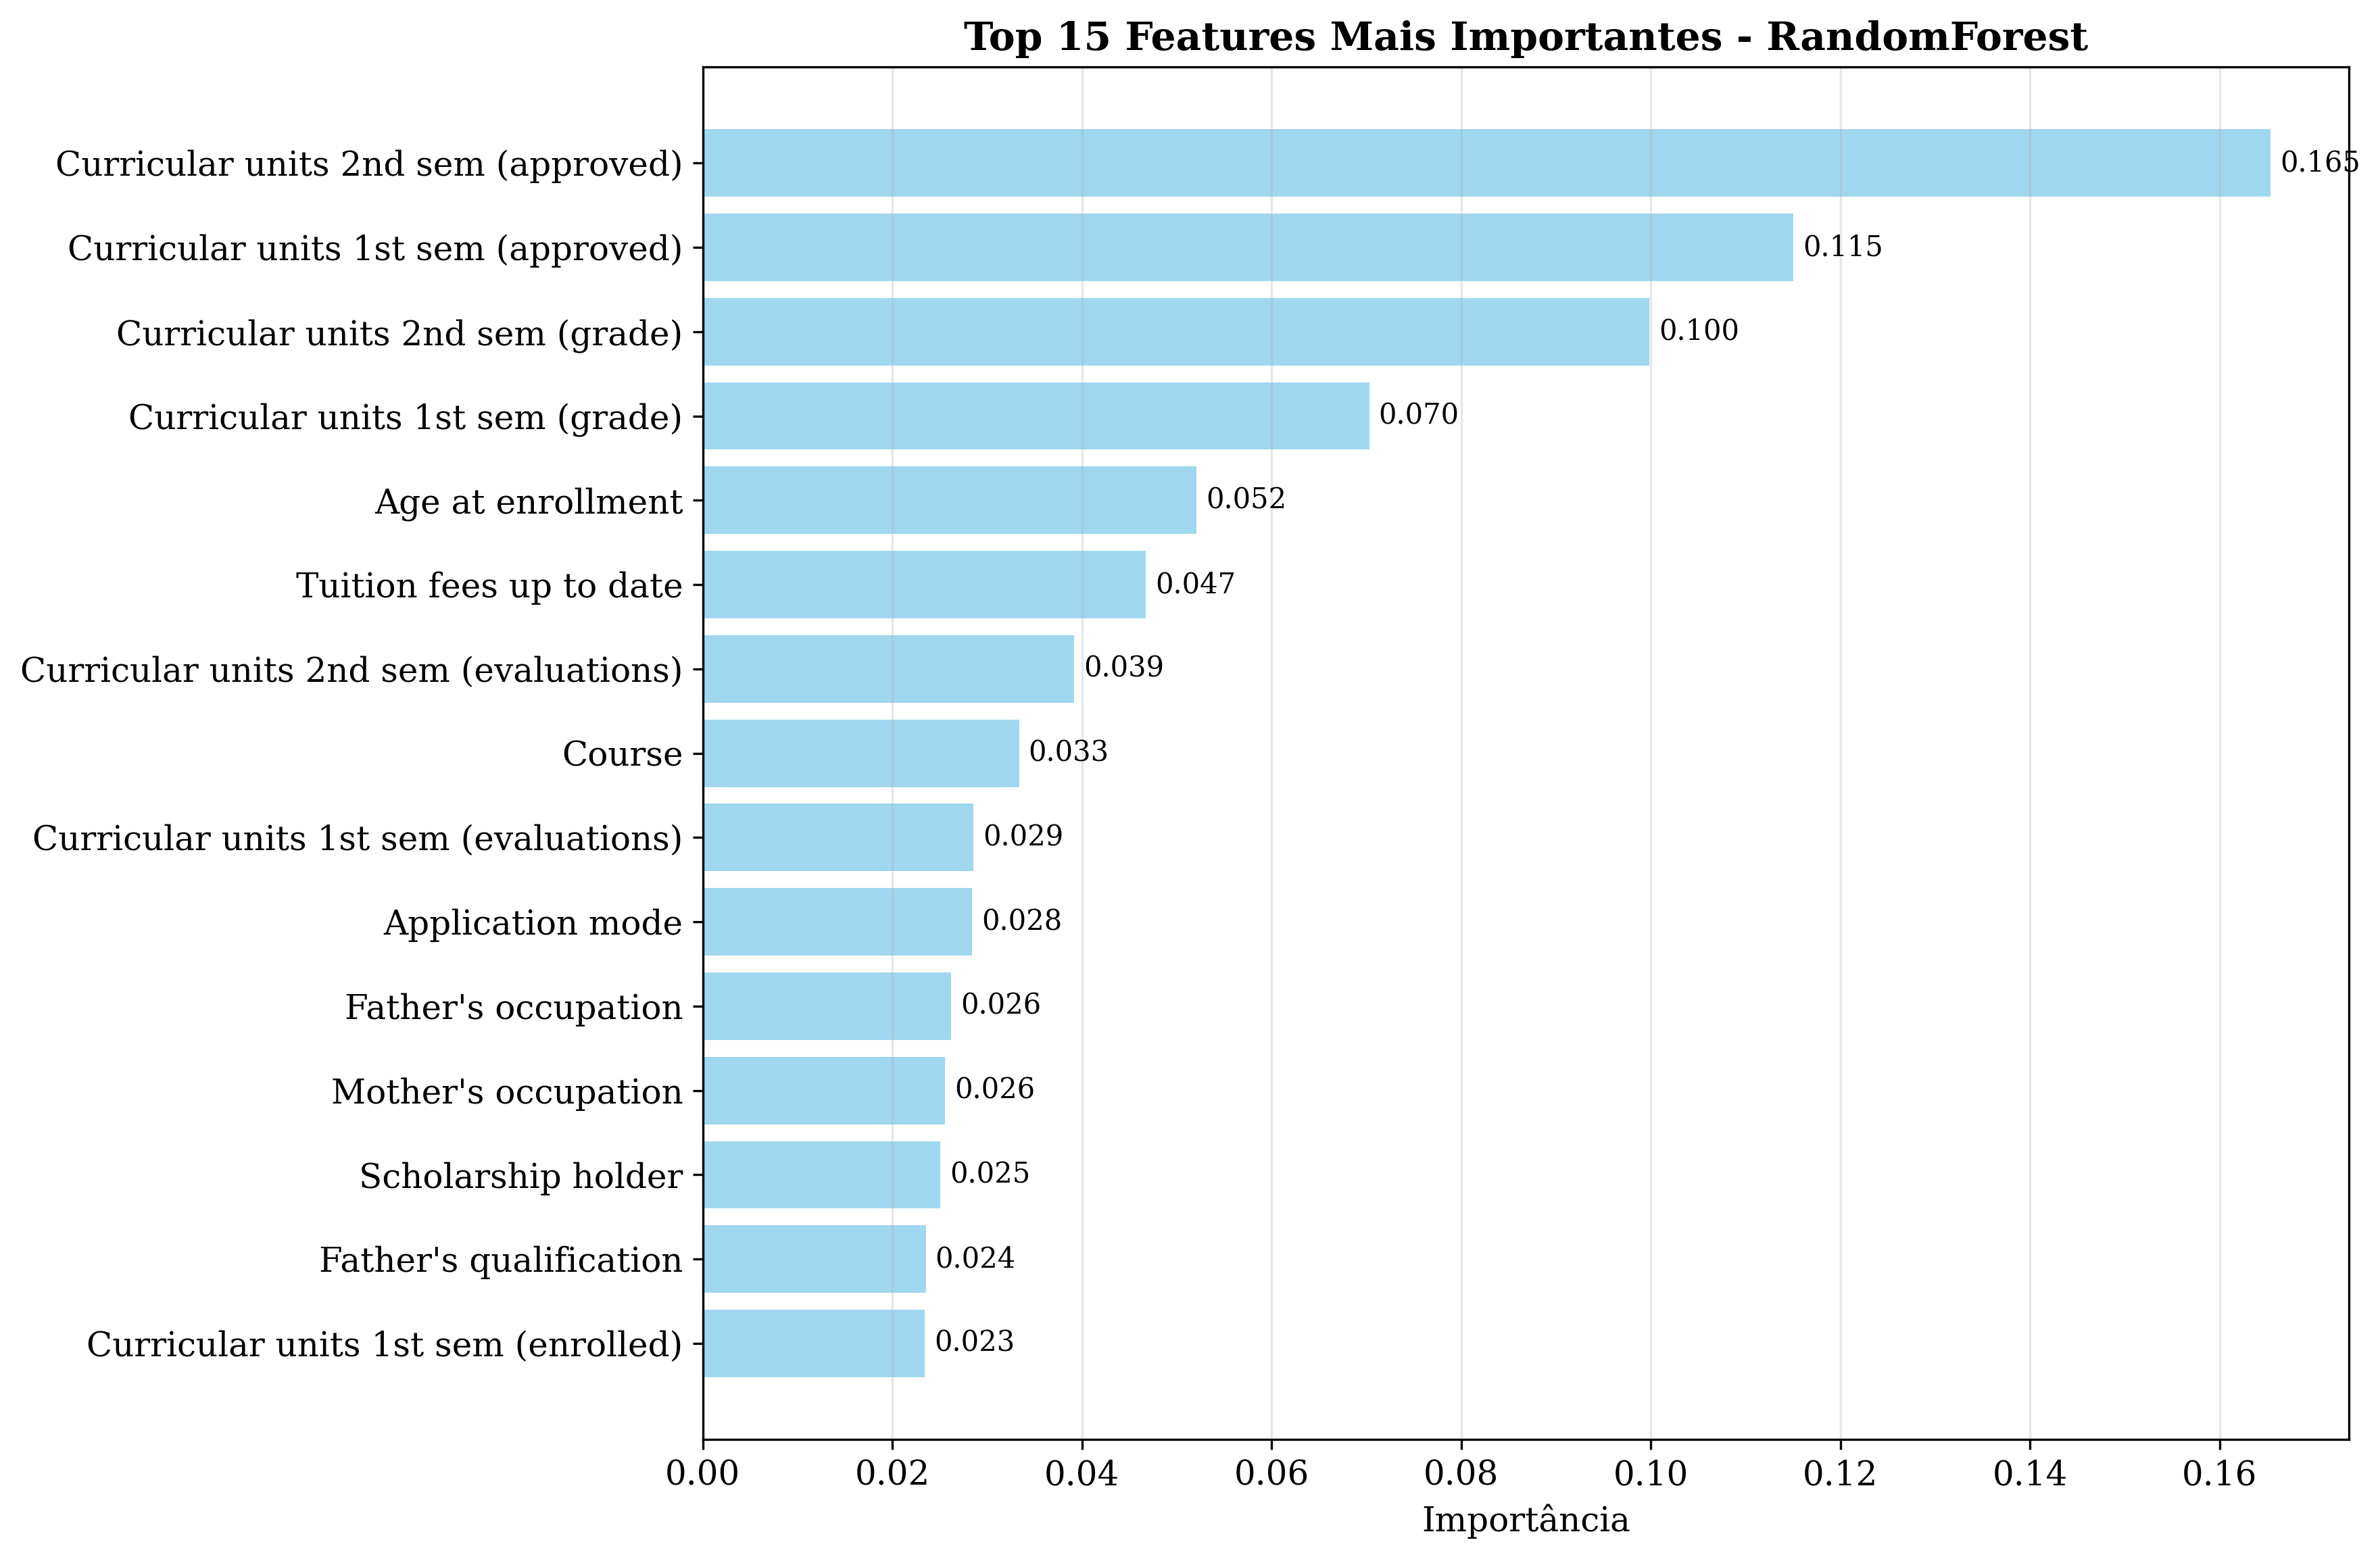

In [18]:
# ===== ANÁLISE DE FEATURE IMPORTANCE =====
print("\n" + "="*50)
print(" ANÁLISE DE IMPORTÂNCIA DAS FEATURES")
print("="*50)

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Treinar modelo com random_state fixo
best_model = RandomForestClassifier(random_state=SEED)
best_model.fit(X_train_best, y_train_best)

# Análise de importância (seu código)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train_best.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\n=== TOP 15 FEATURES MAIS IMPORTANTES - RandomForest ===")
    print(feature_importance.head(15).to_string(index=False, float_format='%.4f'))

    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)

    plt.barh(range(len(top_features)), top_features['importance'], color='skyblue', alpha=0.8)
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Importância', fontsize=12)
    plt.title('Top 15 Features Mais Importantes - RandomForest', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')

    for i, (_, row) in enumerate(top_features.iterrows()):
        plt.text(row['importance'] + 0.001, i, f'{row["importance"]:.3f}',
                va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

In [19]:
# ===== RESUMO EXECUTIVO E CONCLUSÕES =====
print("\n" + "="*50)
print(" RESUMO EXECUTIVO E CONCLUSÕES")
print("="*50)

print(f"\n=== RESUMO DOS EXPERIMENTOS ===")
print(f"Total de combinações testadas: {len(all_results)}")
print(f"Algoritmos avaliados: {', '.join(models.keys())}")
print(f"Técnicas de balanceamento testadas: {len(experiments)}")
print(f"   • Sem Balanceamento (baseline)")
print(f"   • SMOTE (oversampling)")
print(f"   • Under-sampling")
print(f"   • SMOTE + Tomek Links (híbrida)")
print(f"   • SMOTE + ENN (híbrida)")

print(f"\n=== MELHOR DESEMPENHO ALCANÇADO ===")
print(f"Melhor combinação: {best_result['Model']} + {best_result['Balance_Technique']}")
print(f"F1-Score: {best_result['F1_Score']:.3f} ({best_result['F1_Score']:.1%})")
print(f"Precisão: {best_result['Precision']:.3f} ({best_result['Precision']:.1%})")
print(f"Recall: {best_result['Recall']:.3f} ({best_result['Recall']:.1%})")
print(f"AUC-ROC: {best_result['AUC_ROC']:.3f}")

# Análise das técnicas híbridas
smote_pure_results = results_df[results_df['Balance_Technique'] == 'SMOTE']
hybrid_results = results_df[results_df['Balance_Technique'].isin(['SMOTE+Tomek', 'SMOTE+ENN'])]

print(f"\n=== ANÁLISE DAS TÉCNICAS HÍBRIDAS ===")
hybrid_improvements = 0
total_hybrid_comparisons = 0

for _, smote_row in smote_pure_results.iterrows():
    model_name = smote_row['Model']
    model_hybrids = hybrid_results[hybrid_results['Model'] == model_name]

    for _, hybrid_row in model_hybrids.iterrows():
        total_hybrid_comparisons += 1
        if hybrid_row['F1_Score'] > smote_row['F1_Score']:
            hybrid_improvements += 1

improvement_rate = (hybrid_improvements / total_hybrid_comparisons * 100) if total_hybrid_comparisons > 0 else 0

print(f" Melhorias com técnicas híbridas: {hybrid_improvements}/{total_hybrid_comparisons} ({improvement_rate:.1f}%)")

# Identificar a melhor técnica híbrida
best_hybrid = hybrid_results.loc[hybrid_results['F1_Score'].idxmax()] if not hybrid_results.empty else None
if best_hybrid is not None:
    print(f" Melhor técnica híbrida: {best_hybrid['Model']} + {best_hybrid['Balance_Technique']}")
    print(f"   F1-Score: {best_hybrid['F1_Score']:.3f}")

print(f"\n=== RECOMENDAÇÕES PARA PRODUÇÃO ===")
print(f"1. Modelo recomendado: {best_result['Model']} com {best_result['Balance_Technique']}")
print(f"2. Monitorar métricas: F1-Score, Recall (detecção de dropout) e Precisão (reduzir falsos positivos)")
print(f"3. Retreinar periodicamente com novos dados para manter performance")
print(f"4. Considerar ajuste de threshold se precisão/recall precisarem ser rebalanceados")

if best_result['Balance_Technique'] in ['SMOTE+Tomek', 'SMOTE+ENN']:
    print(f"5. Técnica híbrida escolhida ({best_result['Balance_Technique']}) oferece melhor limpeza dos dados")
    print(f"   • Remove amostras ambíguas na fronteira de decisão")
    print(f"   • Reduz overfitting potencial do SMOTE puro")

print(f"\n=== INSIGHTS PRINCIPAIS ===")
print(f"• As técnicas de balanceamento mostraram impacto significativo na detecção de dropout")
print(f"• Técnicas híbridas (SMOTE+Tomek/ENN) podem oferecer melhor qualidade de dados balanceados")
print(f"• Validação cruzada confirma estabilidade do modelo escolhido")
print(f"• Explicabilidade via LIME permite interpretação das predições para stakeholders")

print(f"\n" + "="*70)
print(" EXPERIMENTO CONCLUÍDO COM SUCESSO!")
print("="*70)



 RESUMO EXECUTIVO E CONCLUSÕES

=== RESUMO DOS EXPERIMENTOS ===
Total de combinações testadas: 10
Algoritmos avaliados: Random Forest, XGBoost
Técnicas de balanceamento testadas: 5
   • Sem Balanceamento (baseline)
   • SMOTE (oversampling)
   • Under-sampling
   • SMOTE + Tomek Links (híbrida)
   • SMOTE + ENN (híbrida)

=== MELHOR DESEMPENHO ALCANÇADO ===
Melhor combinação: Random Forest + SMOTE+Tomek
F1-Score: 0.823 (82.3%)
Precisão: 0.844 (84.4%)
Recall: 0.803 (80.3%)
AUC-ROC: 0.935

=== ANÁLISE DAS TÉCNICAS HÍBRIDAS ===
 Melhorias com técnicas híbridas: 1/4 (25.0%)
 Melhor técnica híbrida: Random Forest + SMOTE+Tomek
   F1-Score: 0.823

=== RECOMENDAÇÕES PARA PRODUÇÃO ===
1. Modelo recomendado: Random Forest com SMOTE+Tomek
2. Monitorar métricas: F1-Score, Recall (detecção de dropout) e Precisão (reduzir falsos positivos)
3. Retreinar periodicamente com novos dados para manter performance
4. Considerar ajuste de threshold se precisão/recall precisarem ser rebalanceados
5. Técnica


 GERANDO FIGURAS PARA ARTIGO CIENTÍFICO
Gerando Figura X: Comparação de desempenho dos modelos...


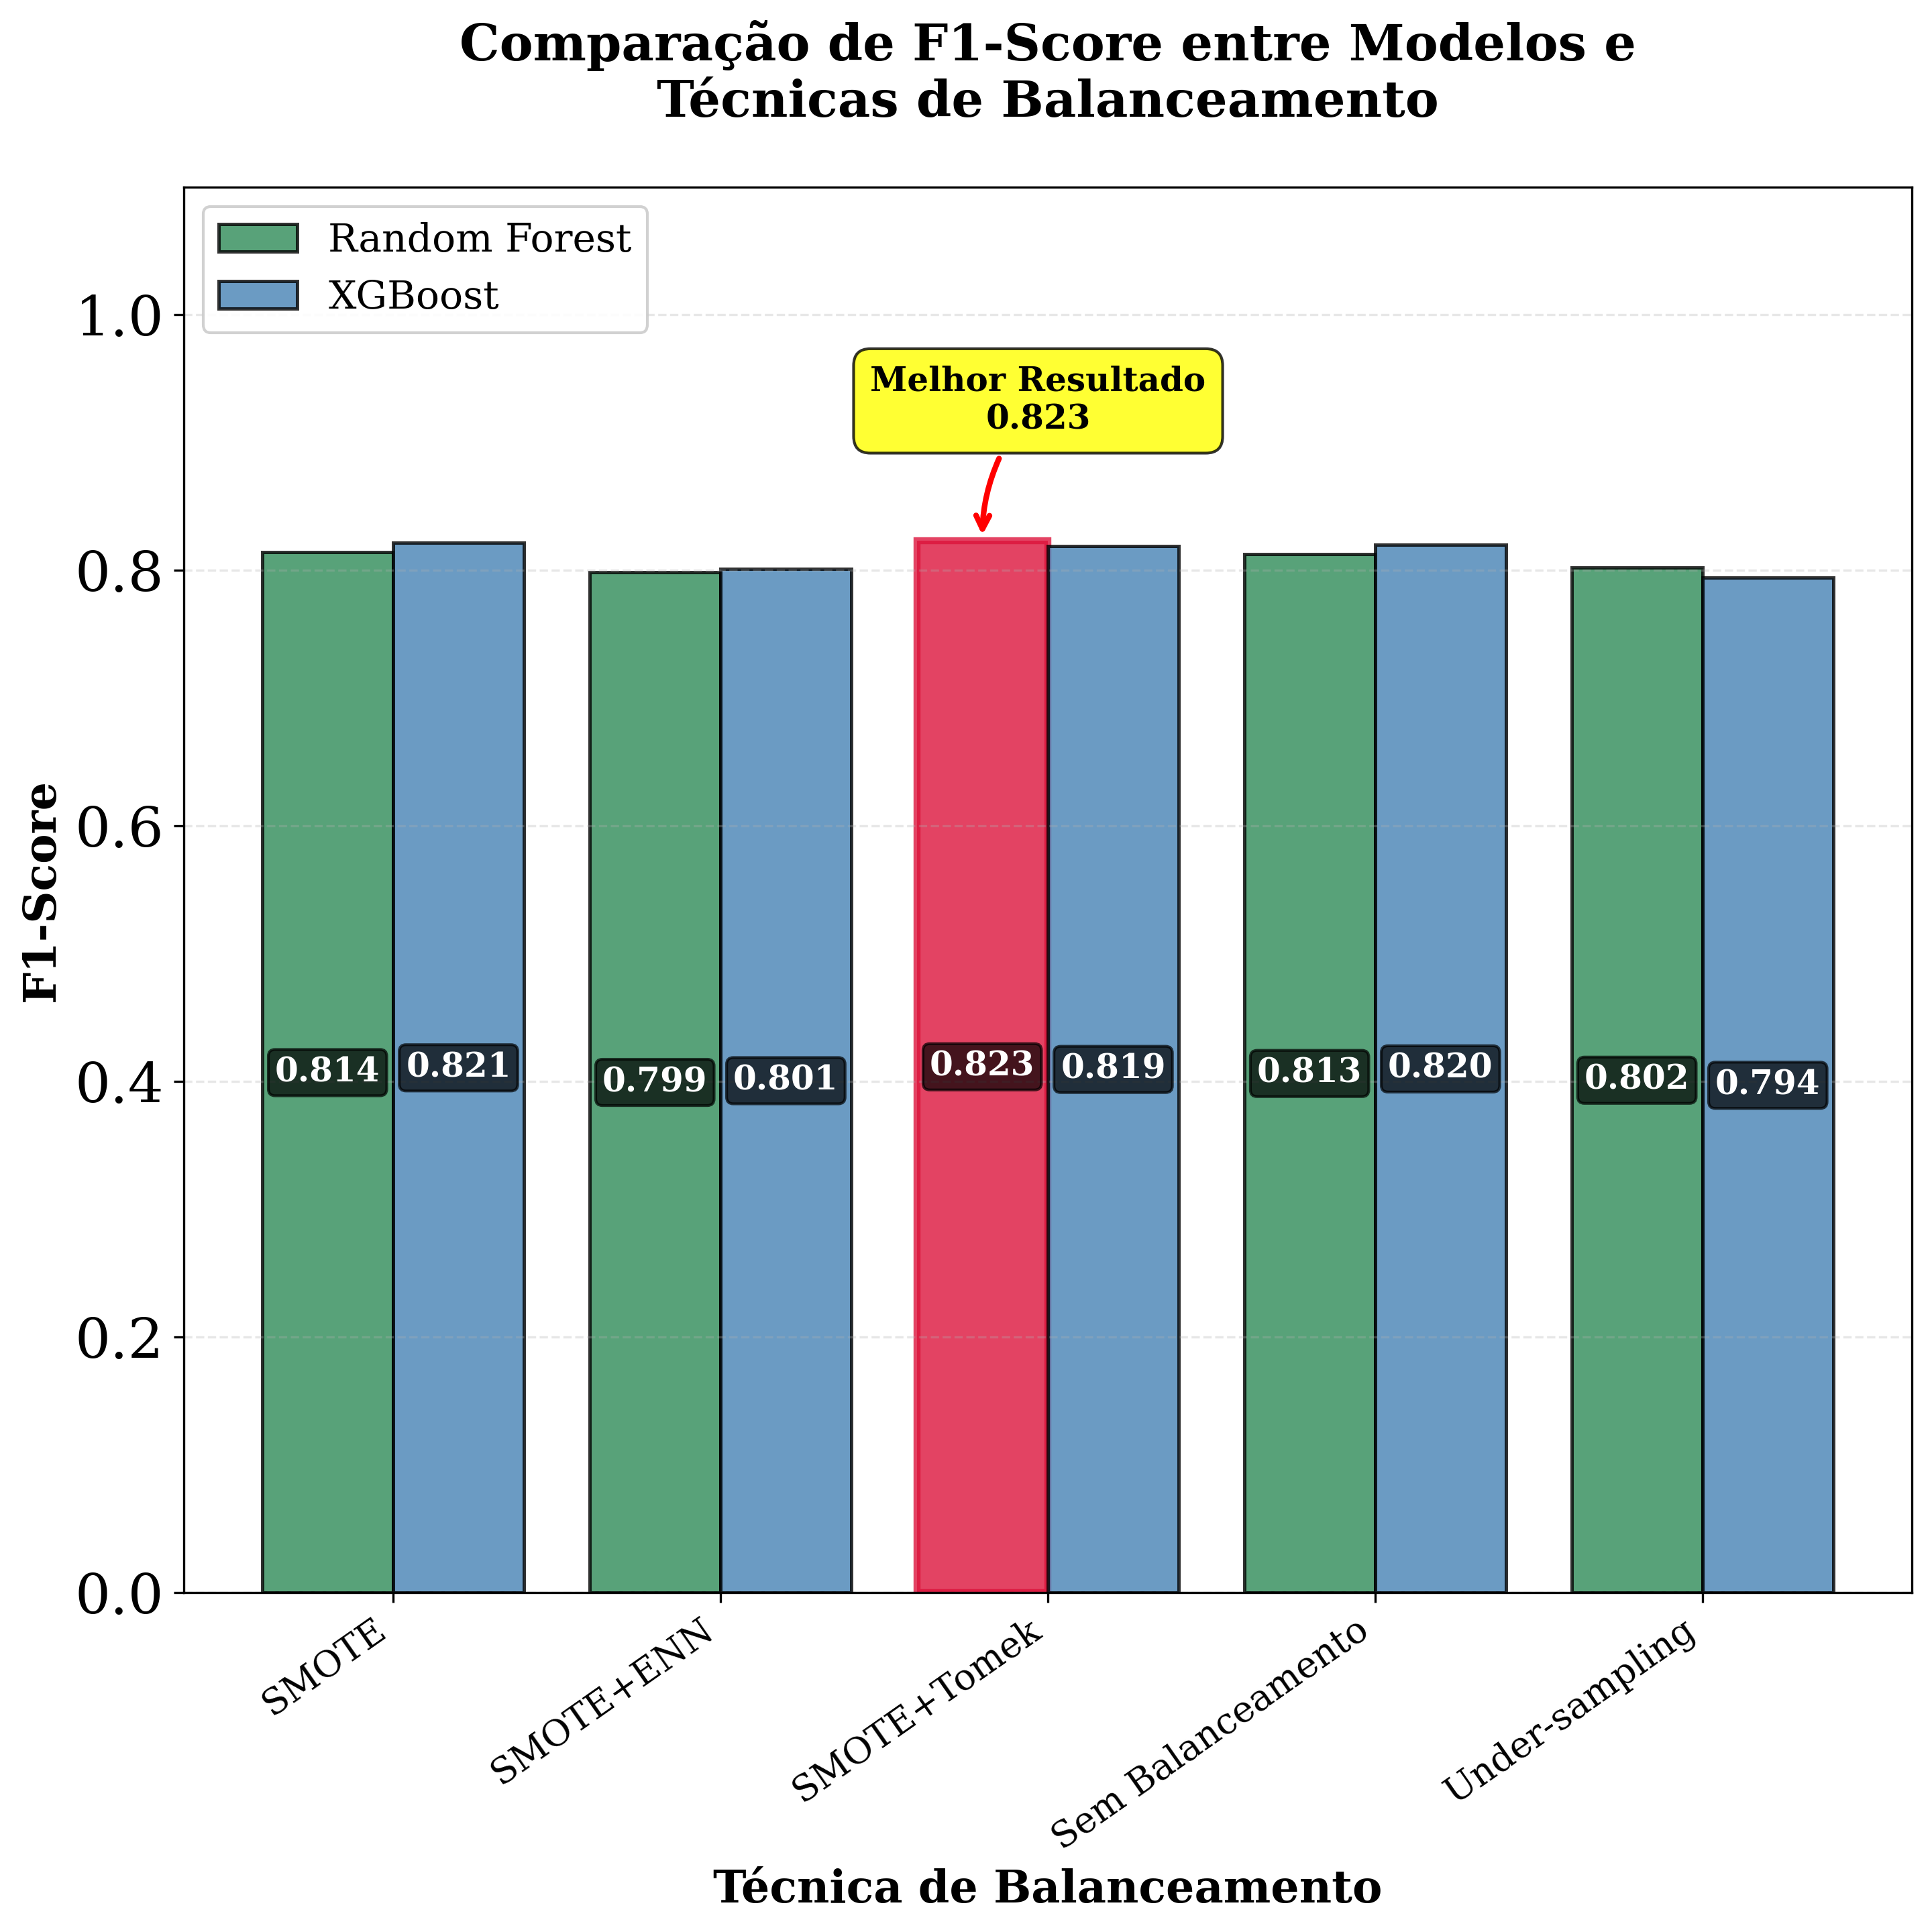

Gerando Figura Y: Matriz de confusão do melhor modelo...


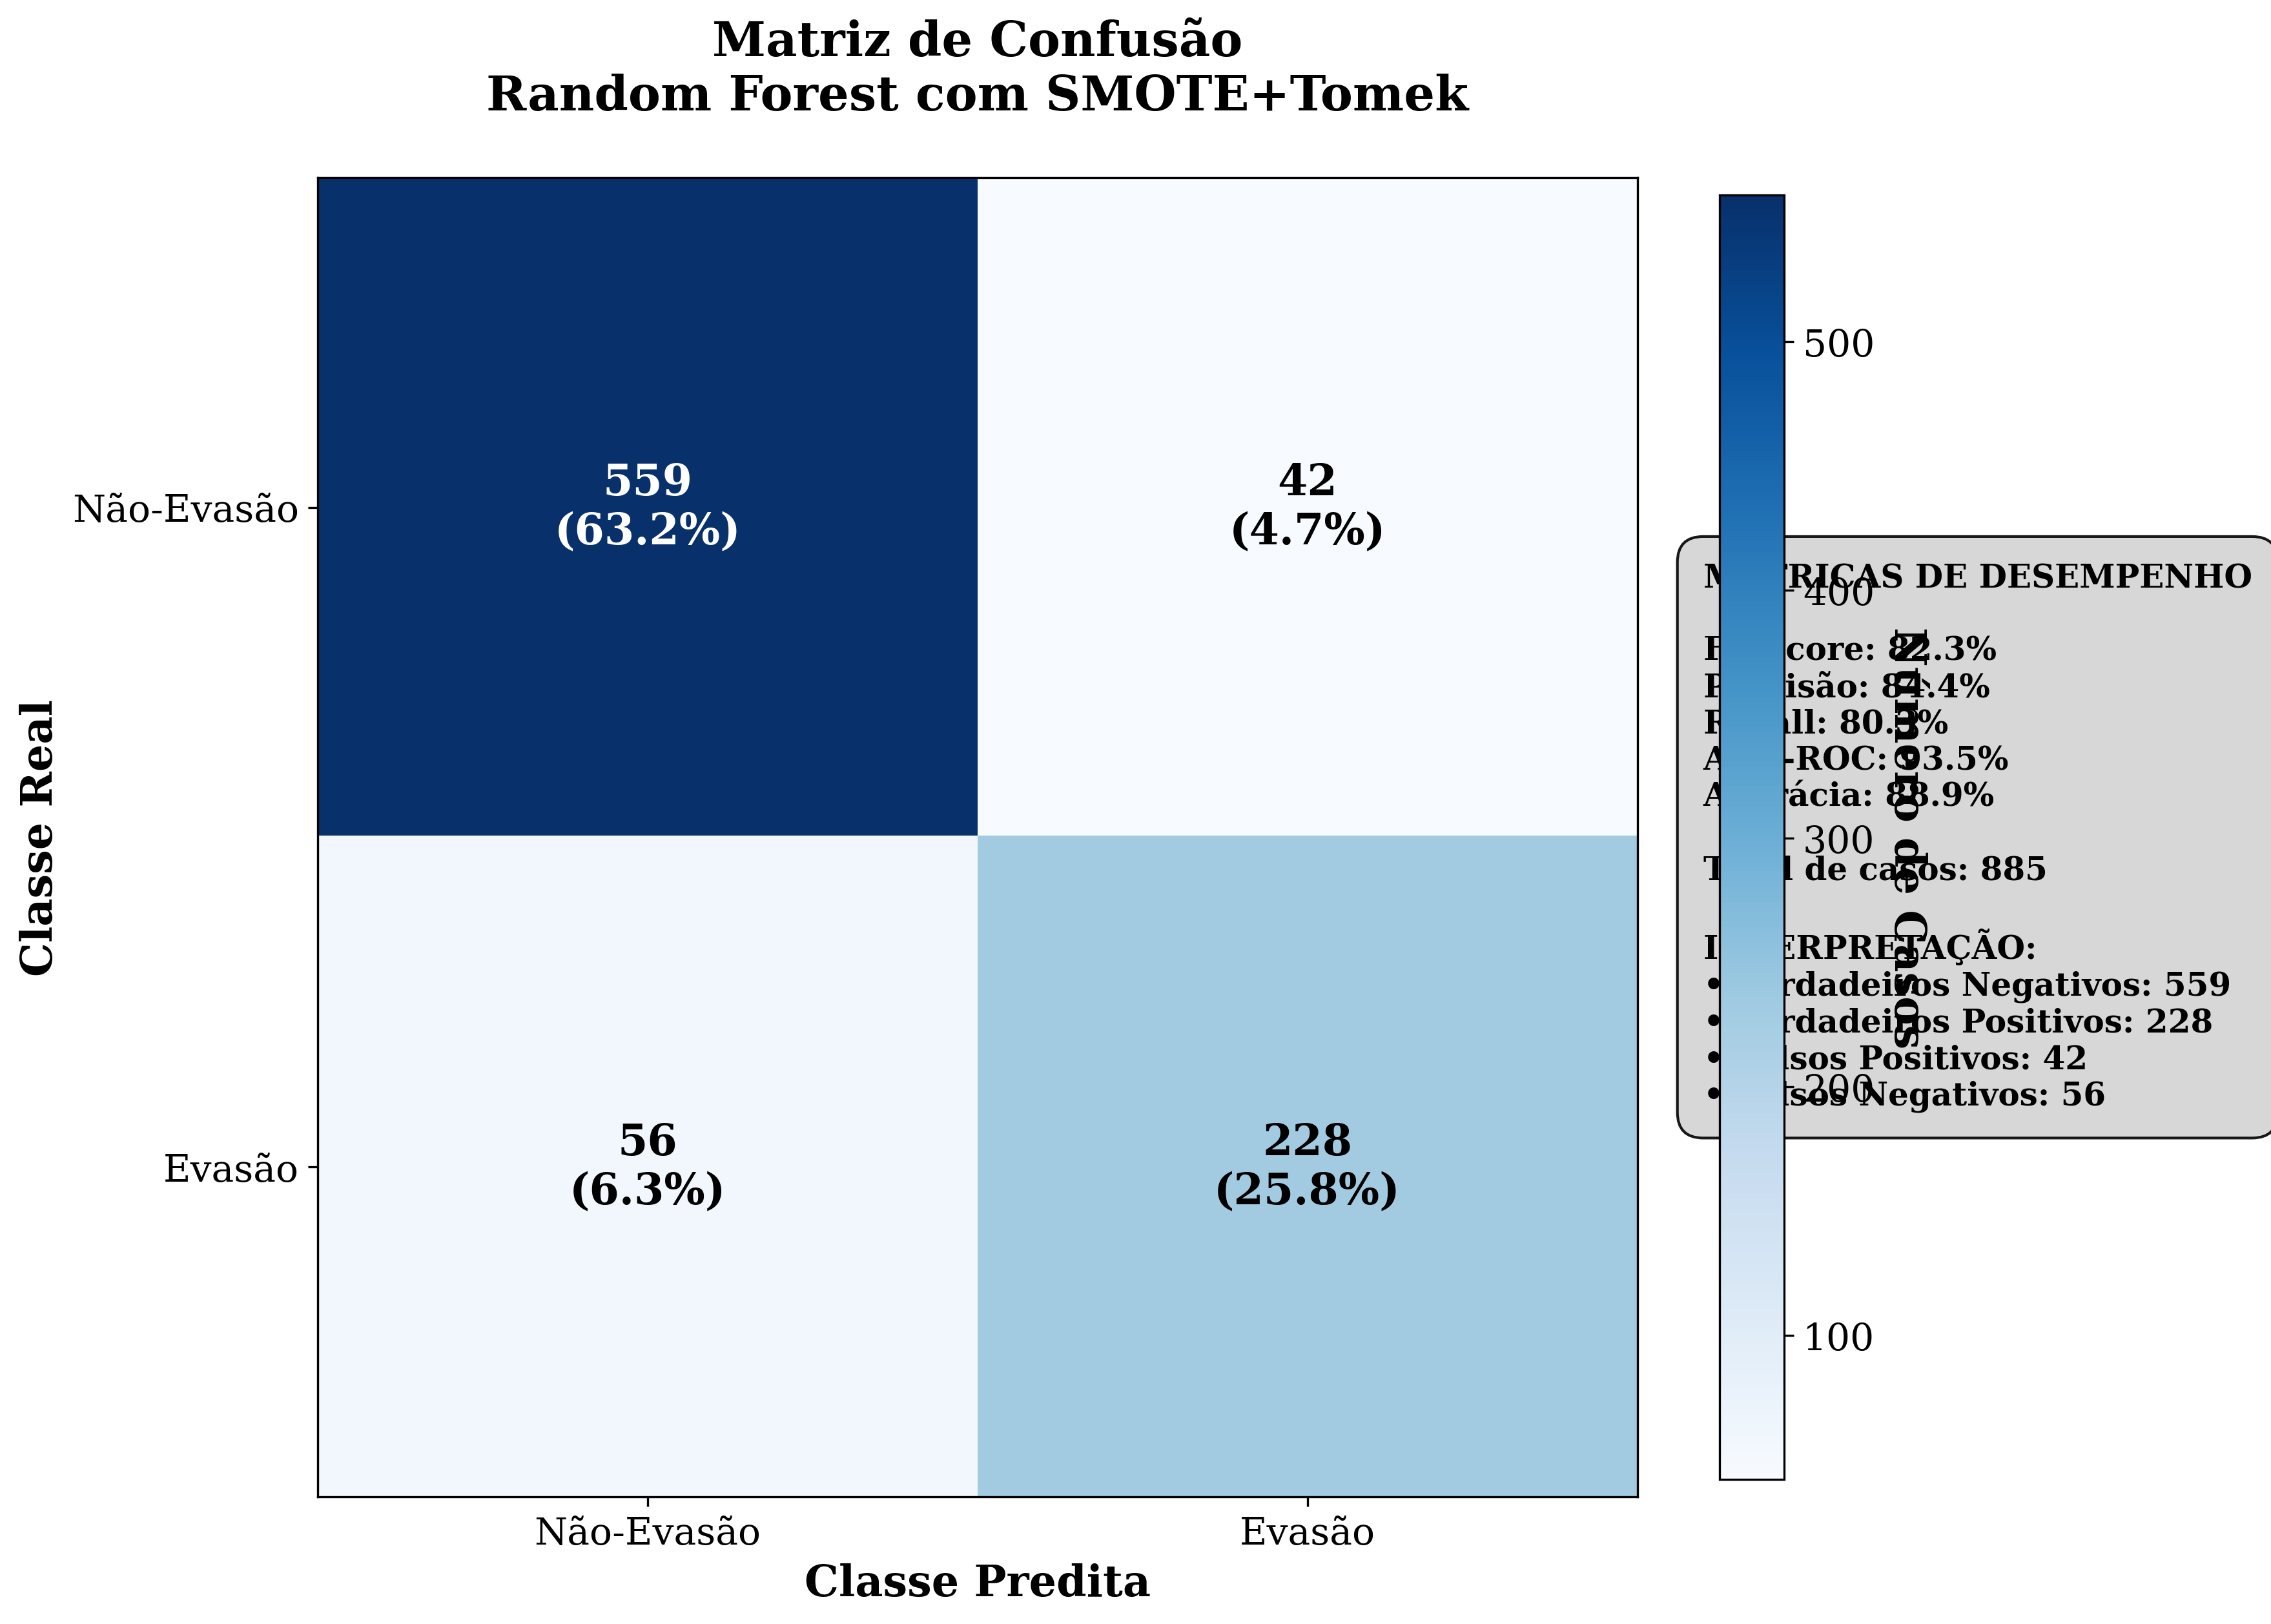

Gerando Figura Adicional: Comparação de todas as métricas...


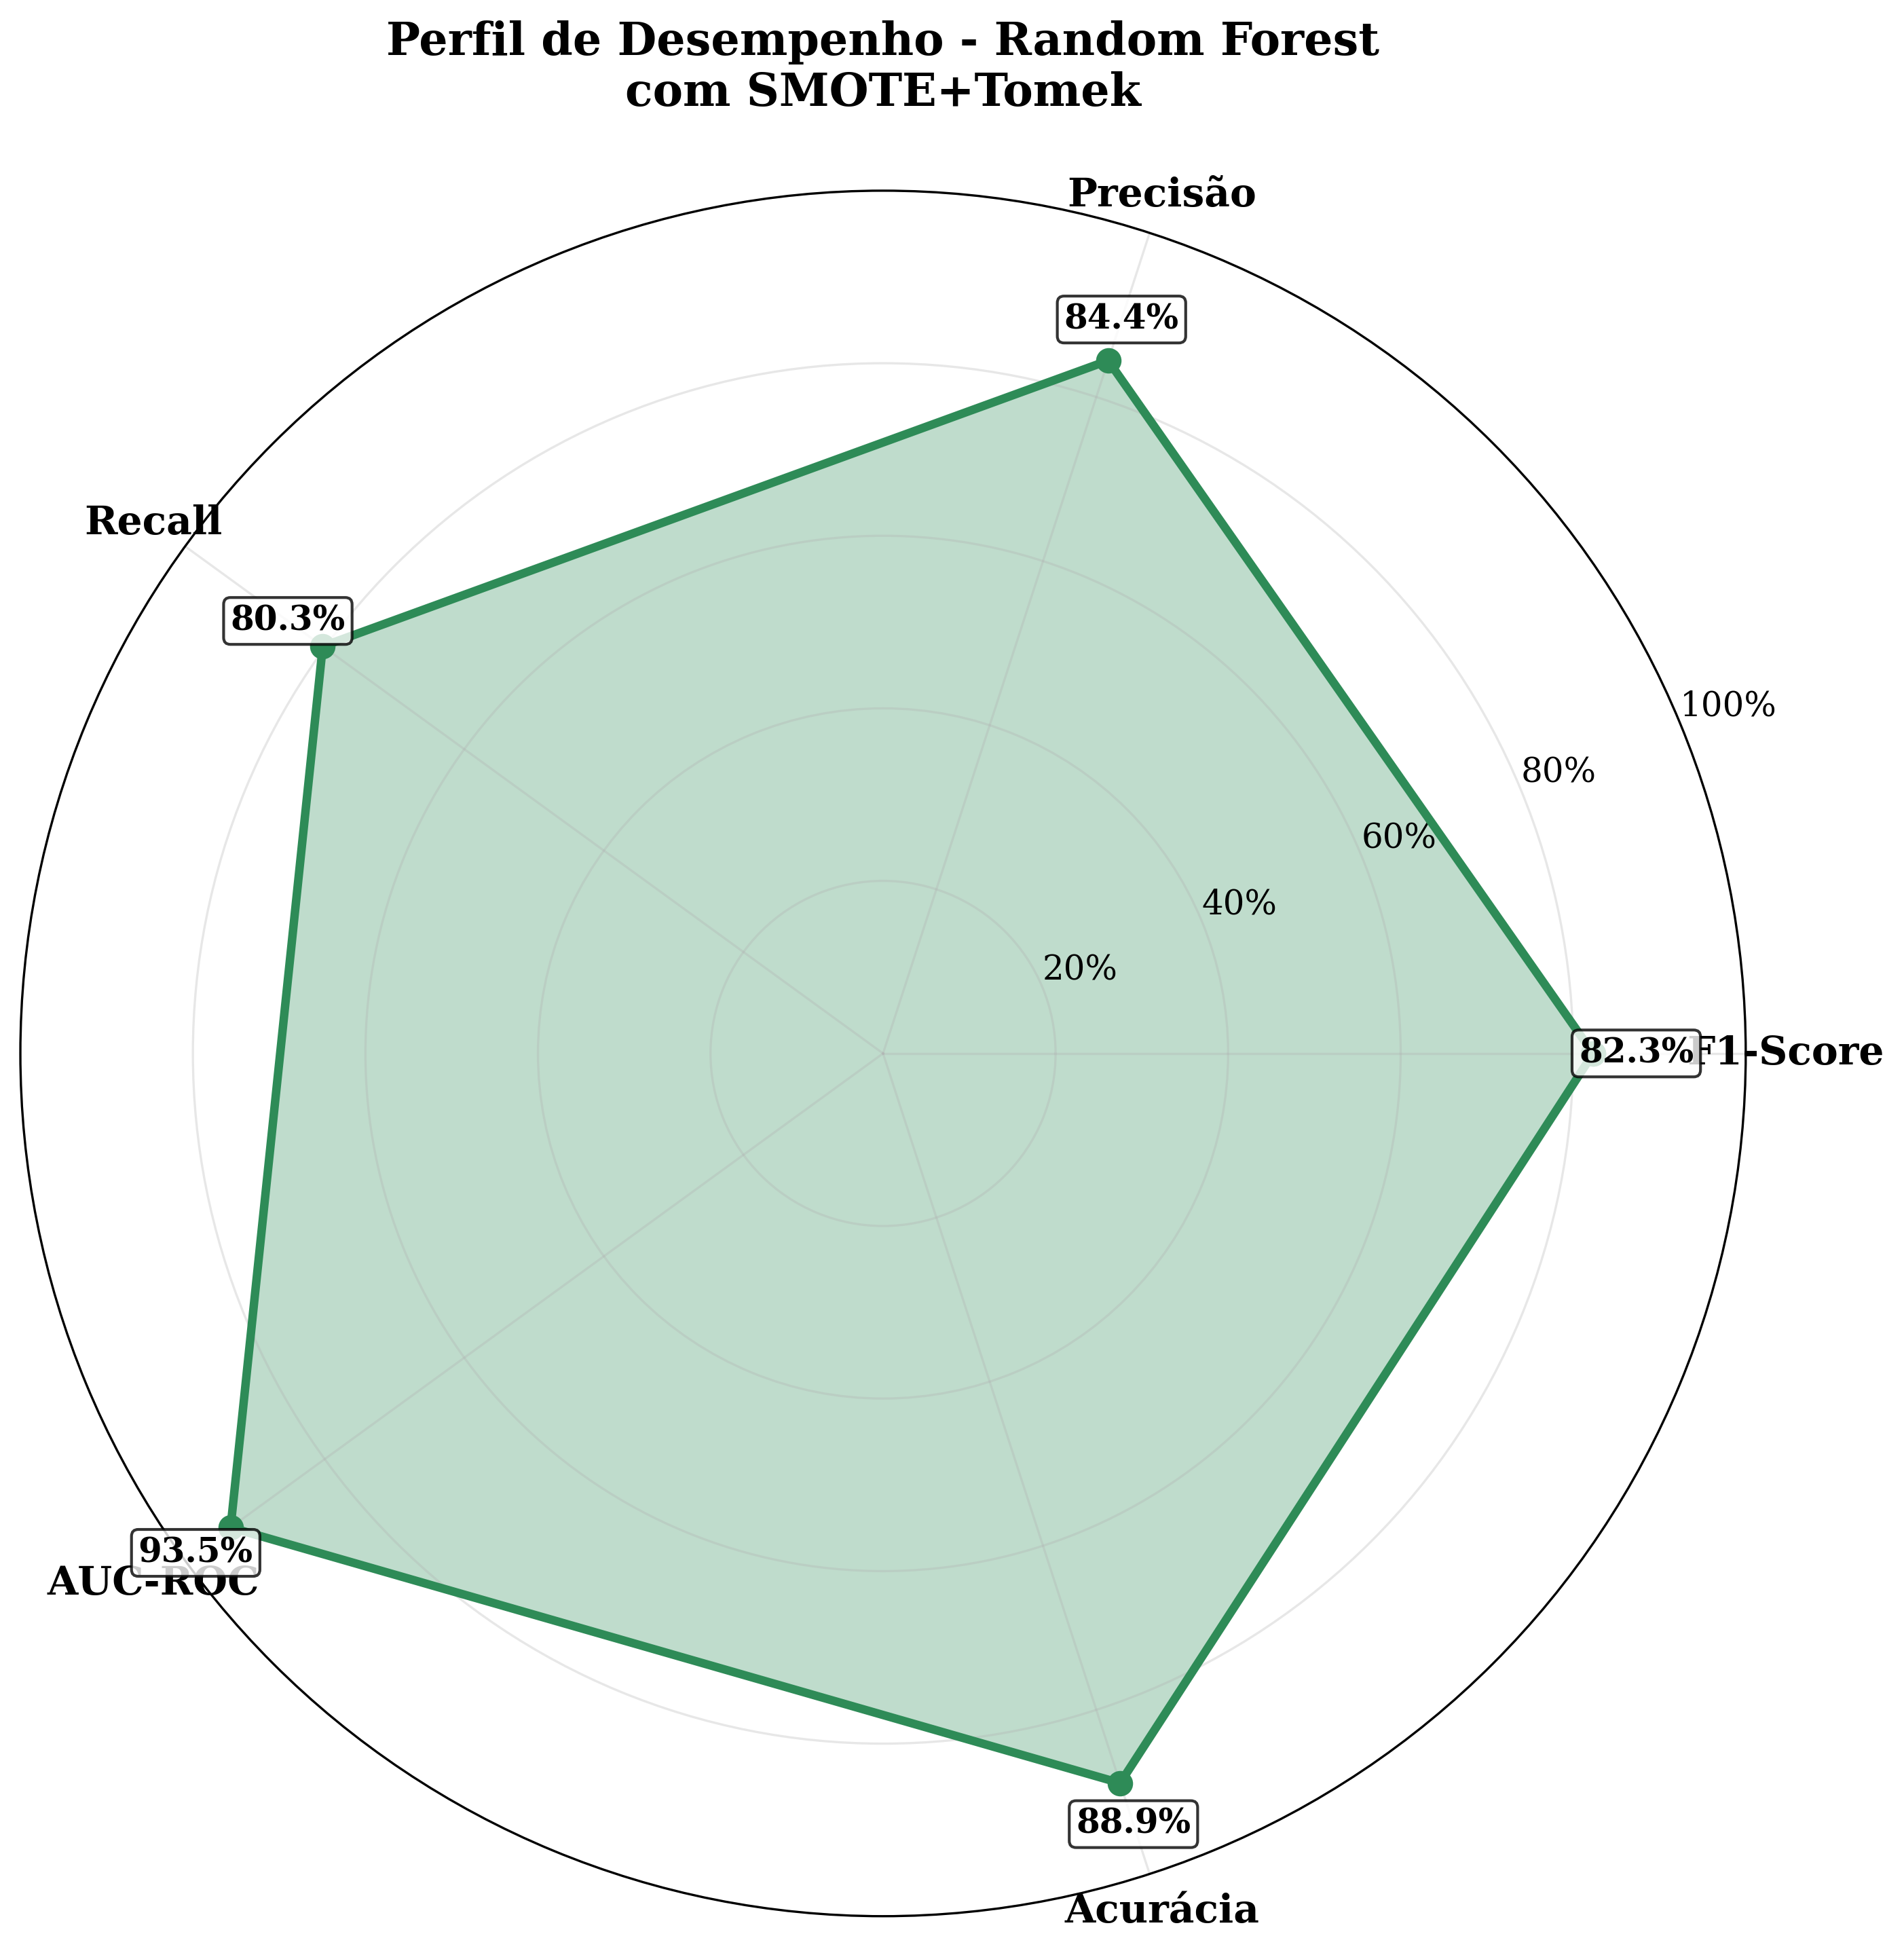


=== RESUMO DOS RESULTADOS ===
Melhor modelo: Random Forest + SMOTE+Tomek
F1-Score: 0.823 (82.3%)
Precisão: 0.844 (84.4%)
Recall: 0.803 (80.3%)
AUC-ROC: 0.935 (93.5%)

Matriz de Confusão:
  Casos de não-evasão corretamente identificados: 559
  Casos de evasão corretamente identificados: 228
  Falsos positivos (não-evasão classificada como evasão): 42
  Falsos negativos (evasão classificada como não-evasão): 56


In [21]:
# ===== GRÁFICOS FINAIS PARA ANÁLISE, PARA VERIFICAR MELHOR OS RESULTADOS =====

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Configurações aprimoradas para artigo científico
plt.rcParams.update({
    'font.size': 20,           # Aumentado de 11
    'font.family': 'serif',
    'axes.titlesize': 18,      # Aumentado de 13
    'axes.labelsize': 20,      # Aumentado de 11
    'xtick.labelsize': 20,     # Aumentado de 10
    'ytick.labelsize': 20,     # Aumentado de 10
    'legend.fontsize': 20,     # Aumentado de 10
    'figure.dpi': 300
})

print("\n" + "="*60)
print(" GERANDO FIGURAS PARA ARTIGO CIENTÍFICO")
print("="*60)

# ===== FIGURA X: COMPARAÇÃO DE DESEMPENHO =====
print("Gerando Figura X: Comparação de desempenho dos modelos...")

# Formato mais quadrado (10x10 ao invés de 12x8)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Preparar dados do F1-Score (métrica principal mencionada no texto)
pivot_f1 = results_df.pivot_table(
    index='Balance_Technique',
    columns='Model',
    values='F1_Score'
)

# Criar gráfico de barras com barras mais largas
x = np.arange(len(pivot_f1.index))
width = 0.4  # Aumentado de 0.35 para barras mais largas

bars1 = ax.bar(x - width/2, pivot_f1['Random Forest'], width,
               label='Random Forest', color='#2E8B57', alpha=0.8,
               edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, pivot_f1['XGBoost'], width,
               label='XGBoost', color='#4682B4', alpha=0.8,
               edgecolor='black', linewidth=1.2)

# Destacar o melhor resultado (Random Forest + SMOTE+Tomek)
best_idx = list(pivot_f1.index).index(best_result['Balance_Technique'])
if best_result['Model'] == 'Random Forest':
    bars1[best_idx].set_color('#DC143C')
    bars1[best_idx].set_linewidth(2.5)
else:
    bars2[best_idx].set_color('#DC143C')
    bars2[best_idx].set_linewidth(2.5)

# Configurações do gráfico
ax.set_xlabel('Técnica de Balanceamento', fontweight='bold', fontsize=16)
ax.set_ylabel('F1-Score', fontweight='bold', fontsize=16)
ax.set_title('Comparação de F1-Score entre Modelos e\nTécnicas de Balanceamento',
             fontweight='bold', fontsize=18, pad=25)
ax.set_xticks(x)
ax.set_xticklabels(pivot_f1.index, rotation=35, ha='right', fontsize=13)
ax.legend(loc='upper left', fontsize=14, framealpha=0.9)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
ax.set_ylim(0, 1.1)  # Mais espaço no topo

# Adicionar valores DENTRO das barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            # Colocar texto no centro da barra (altura/2)
            ax.text(bar.get_x() + bar.get_width()/2., height/2,
                    f'{height:.3f}', ha='center', va='center',
                    fontsize=12, fontweight='bold', color='white',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.7))

# Destacar o melhor resultado com anotação melhorada
best_value = best_result['F1_Score']
arrow_x = best_idx - width/2 if best_result['Model'] == 'Random Forest' else best_idx + width/2
ax.annotate(f'Melhor Resultado\n{best_value:.3f}',
            xy=(arrow_x, best_value),
            xytext=(20, 40), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2',
                          lw=2, color='red'),
            fontsize=12, fontweight='bold', ha='center')

plt.tight_layout()
plt.savefig('figura_x_comparacao_f1score.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

# ===== FIGURA Y: MATRIZ DE CONFUSÃO =====
print("Gerando Figura Y: Matriz de confusão do melhor modelo...")

# Obter predições do melhor modelo
best_pred, _ = predictions[best_model_key]

# Calcular matriz de confusão
cm = confusion_matrix(y_test, best_pred)

# Formato quadrado para matriz de confusão
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plotar matriz de confusão
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
cbar.ax.set_ylabel('Número de Casos', rotation=-90, va="bottom",
                   fontweight='bold', fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Labels e título
classes = ['Não-Evasão', 'Evasão']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes)

# Título dividido em linhas para melhor formatação
title = f'Matriz de Confusão\n{best_result["Model"]} com {best_result["Balance_Technique"]}'
ax.set_title(title, fontweight='bold', fontsize=18, pad=25)
ax.set_xlabel('Classe Predita', fontweight='bold', fontsize=16)
ax.set_ylabel('Classe Real', fontweight='bold', fontsize=16)

# Ajustar tamanho dos ticks
ax.tick_params(axis='both', which='major', labelsize=14)

# Adicionar valores e percentuais na matriz com fontes maiores
thresh = cm.max() / 2.
total = cm.sum()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = cm[i, j]
        percentage = (value / total) * 100
        text = f'{value:,}\n({percentage:.1f}%)'  # Formatação com vírgulas para milhares
        ax.text(j, i, text, ha="center", va="center",
                color="white" if value > thresh else "black",
                fontsize=16, fontweight='bold')  # Aumentado de 14

# Adicionar métricas na lateral com formatação melhorada
metrics_text = f"""MÉTRICAS DE DESEMPENHO

F1-Score: {best_result['F1_Score']:.1%}
Precisão: {best_result['Precision']:.1%}
Recall: {best_result['Recall']:.1%}
AUC-ROC: {best_result['AUC_ROC']:.1%}
Acurácia: {best_result['Accuracy']:.1%}

Total de casos: {total:,}

INTERPRETAÇÃO:
• Verdadeiros Negativos: {cm[0,0]:,}
• Verdadeiros Positivos: {cm[1,1]:,}
• Falsos Positivos: {cm[0,1]:,}
• Falsos Negativos: {cm[1,0]:,}"""

ax.text(1.05, 0.5, metrics_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='center', fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='lightgray', alpha=0.9))

plt.tight_layout()
plt.savefig('figura_y_matriz_confusao.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

# ===== FIGURA ADICIONAL: MÉTRICAS COMPARATIVAS =====
print("Gerando Figura Adicional: Comparação de todas as métricas...")

# Criar gráfico radar/spider para comparar métricas do melhor modelo
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Métricas para o gráfico radar
metrics = ['F1-Score', 'Precisão', 'Recall', 'AUC-ROC', 'Acurácia']
values = [
    best_result['F1_Score'],
    best_result['Precision'],
    best_result['Recall'],
    best_result['AUC_ROC'],
    best_result['Accuracy']
]

# Calcular ângulos
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
values += values[:1]  # Fechar o polígono
angles += angles[:1]

# Plotar
ax.plot(angles, values, 'o-', linewidth=3, color='#2E8B57', markersize=8)
ax.fill(angles, values, color='#2E8B57', alpha=0.3)

# Configurações
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=14, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=12)
ax.grid(True, alpha=0.3)

# Título
plt.title(f'Perfil de Desempenho - {best_result["Model"]}\ncom {best_result["Balance_Technique"]}',
          fontsize=16, fontweight='bold', pad=30)

# Adicionar valores nas pontas
for angle, value, metric in zip(angles[:-1], values[:-1], metrics):
    ax.text(angle, value + 0.05, f'{value:.1%}',
            ha='center', va='center', fontsize=12, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('figura_z_radar_metricas.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

# ===== INFORMAÇÕES PARA O ARTIGO =====
print(f"\n=== RESUMO DOS RESULTADOS ===")
print(f"Melhor modelo: {best_result['Model']} + {best_result['Balance_Technique']}")
print(f"F1-Score: {best_result['F1_Score']:.3f} ({best_result['F1_Score']:.1%})")
print(f"Precisão: {best_result['Precision']:.3f} ({best_result['Precision']:.1%})")
print(f"Recall: {best_result['Recall']:.3f} ({best_result['Recall']:.1%})")
print(f"AUC-ROC: {best_result['AUC_ROC']:.3f} ({best_result['AUC_ROC']:.1%})")

tn, fp, fn, tp = cm.ravel()
print(f"\nMatriz de Confusão:")
print(f"  Casos de não-evasão corretamente identificados: {tn:,}")
print(f"  Casos de evasão corretamente identificados: {tp:,}")
print(f"  Falsos positivos (não-evasão classificada como evasão): {fp:,}")
print(f"  Falsos negativos (evasão classificada como não-evasão): {fn:,}")